# Motivation:
Trying to understand how different the high- and low-[$\alpha$/Fe] disks are with resect to itself. Does the low-[$\alpha$/Fe] disk formed in the outer disk different with the low-[$\alpha$/Fe] disk formed in the inner disk? Then compare the result with Tobias' simulation.

# Method:
Splitting the in small bins in [Mg/Fe]-[Fe/H] plane and compare the bin with respect to the neighboring bin. Also split into two disks and see how different it is with changing age and birth radii.

# Tools:
- $\chi^2$ function from Danny
- Birth radii 
- Age from Lu+ 2022
- APOGEE DR17 abundances corrected with logg with Danny's code


In [112]:
from HeaderP import *
import tqdm

## Data part

In [156]:
df = pd.read_pickle('APOGEE_DR17_loggCorrect_rb.pkl')
print(len(df))
df = df.loc[df['[Mg/Fe]_err']<0.015].reset_index(drop=True)
fehbins = np.linspace(-0.75,0.4,15)
df = df.loc[df['[Fe/H]_err']<np.diff(fehbins)[0]].reset_index(drop=True)
len(df)

45427


34953

Splitting data into boxes, one for high-[$\alpha$/Fe] one for low-[$\alpha$/Fe], only select boxes with number of stars > 200

0.08214285714285718
0.08214285714285718


Text(0, 0.5, '[Mg/Fe]')

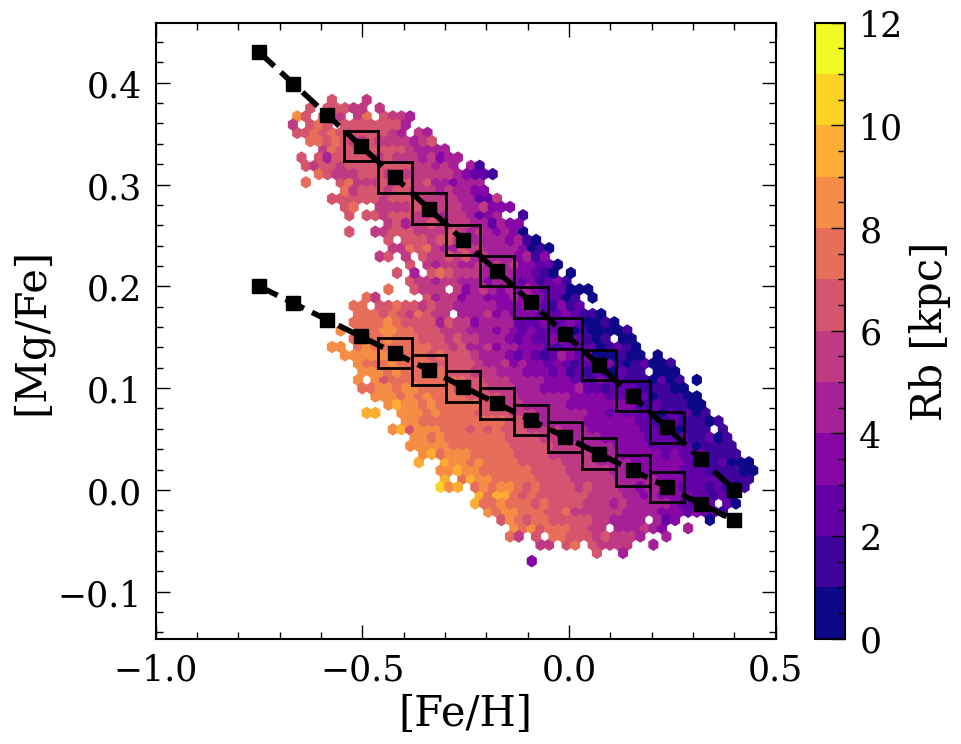

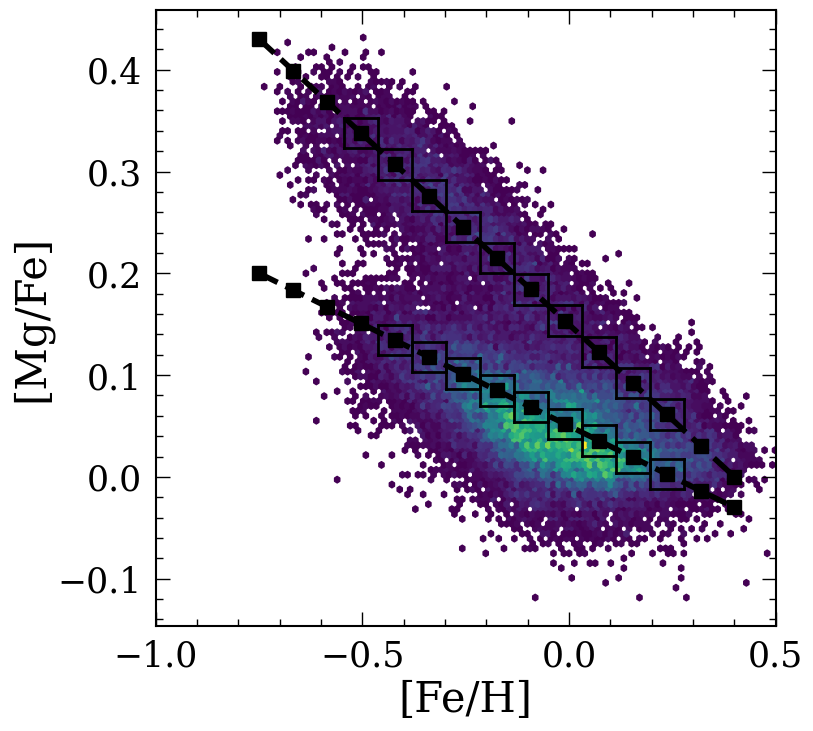

In [158]:
numbselect = 150

plt.figure(figsize=(10,8))
plt.hexbin(df['[Fe/H]'], df['[Mg/Fe]'], C=df['Rb'],
          vmin=0,vmax=12, cmap=plt.get_cmap('plasma',12),mincnt=3,
          gridsize=60)
plt.colorbar(label='Rb [kpc]')
#plt.plot(df_inner['[Fe/H]'], df_inner['[Mg/Fe]'], 'r.', markersize=1)
#plt.plot(df_lowalpha['[Fe/H]'], df_lowalpha['[Mg/Fe]'], 'b.', markersize=1)

mgfe_boxsize = 0.015
mgfe_out = [0.2,-0.03]
mgfe_in = [0.43,0.]

plt.plot([-0.75,0.4],[mgfe_in[0],mgfe_in[1]], 'k--', linewidth=4, zorder=10)
p_inner = fitpoints([-0.75,0.4],[mgfe_in[0],mgfe_in[1]])
plt.plot([-0.75,0.4],[mgfe_out[0],mgfe_out[1]], 'k--', linewidth=4, zorder=10)
p_lowalpha = fitpoints([-0.75,0.4],[mgfe_out[0],mgfe_out[1]])

# draw some bins
#fehbins = fehbins[2:]
print(np.diff(fehbins)[0])

dfeh = np.diff(fehbins)[0]/2

plt.plot(fehbins, p_lowalpha(fehbins), 'ks', markersize=10)
plt.plot(fehbins, p_inner(fehbins), 'ks', markersize=10)


for i in range(len(fehbins)-2):
    df_inner_feh = df.loc[(df['[Fe/H]']>fehbins[i]-dfeh)&(df['[Fe/H]']<fehbins[i]+dfeh)]
    df_lowalpha_feh = df.loc[(df['[Fe/H]']>fehbins[i]-dfeh)&(df['[Fe/H]']<fehbins[i]+dfeh)]

    df_inner_feh_2 = df.loc[(df['[Fe/H]']>fehbins[i+1]-dfeh)&(df['[Fe/H]']<fehbins[i+1]+dfeh)]
    df_lowalpha_feh_2 = df.loc[(df['[Fe/H]']>fehbins[i+1]-dfeh)&(df['[Fe/H]']<fehbins[i+1]+dfeh)]

    # inner box compare
    inner_firstbox = df_inner_feh.loc[(df_inner_feh['[Mg/Fe]']>p_inner(fehbins[i])-mgfe_boxsize)&(df_inner_feh['[Mg/Fe]']<p_inner(fehbins[i])+mgfe_boxsize)]
    inner_secbox = df_inner_feh_2.loc[(df_inner_feh_2['[Mg/Fe]']>p_inner(fehbins[i+1])-mgfe_boxsize)&(df_inner_feh_2['[Mg/Fe]']<p_inner(fehbins[i+1])+mgfe_boxsize)]

    # outer box compare
    outer_firstbox = df_lowalpha_feh.loc[(df_lowalpha_feh['[Mg/Fe]']>p_lowalpha(fehbins[i])-mgfe_boxsize)&(df_lowalpha_feh['[Mg/Fe]']<p_lowalpha(fehbins[i])+mgfe_boxsize)]
    outer_secbox = df_lowalpha_feh_2.loc[(df_lowalpha_feh_2['[Mg/Fe]']>p_lowalpha(fehbins[i+1])-mgfe_boxsize)&(df_lowalpha_feh_2['[Mg/Fe]']<p_lowalpha(fehbins[i+1])+mgfe_boxsize)]

    """print('feh',fehbins[i])
    print(len(inner_firstbox), len(inner_secbox))
    print(len(outer_firstbox), len(outer_secbox))"""
    
    if (len(inner_firstbox)>=numbselect)&(len(inner_secbox)>=numbselect):
        plt.plot([fehbins[i]-dfeh, fehbins[i]+dfeh], 
            [p_inner(fehbins[i])-mgfe_boxsize, p_inner(fehbins[i])-mgfe_boxsize],'k-',
            linewidth=2)
        plt.plot([fehbins[i]-dfeh, fehbins[i]+dfeh], 
                [p_inner(fehbins[i])+mgfe_boxsize, p_inner(fehbins[i])+mgfe_boxsize],'k-',
                linewidth=2)
        plt.plot([fehbins[i]-dfeh, fehbins[i]-dfeh], 
                [p_inner(fehbins[i])-mgfe_boxsize, p_inner(fehbins[i])+mgfe_boxsize],'k-',
                linewidth=2)
        plt.plot([fehbins[i]+dfeh, fehbins[i]+dfeh], 
                [p_inner(fehbins[i])-mgfe_boxsize, p_inner(fehbins[i])+mgfe_boxsize],'k-',
                linewidth=2)
    
    if (len(outer_firstbox)>=numbselect)&(len(outer_secbox)>=numbselect):
        plt.plot([fehbins[i]-dfeh, fehbins[i]+dfeh], 
                [p_lowalpha(fehbins[i])-mgfe_boxsize, p_lowalpha(fehbins[i])-mgfe_boxsize],'k-',
                linewidth=2)
        plt.plot([fehbins[i]-dfeh, fehbins[i]+dfeh], 
                [p_lowalpha(fehbins[i])+mgfe_boxsize, p_lowalpha(fehbins[i])+mgfe_boxsize],'k-',
                linewidth=2)
        plt.plot([fehbins[i]-dfeh, fehbins[i]-dfeh], 
                [p_lowalpha(fehbins[i])-mgfe_boxsize, p_lowalpha(fehbins[i])+mgfe_boxsize],'k-',
                linewidth=2)
        plt.plot([fehbins[i]+dfeh, fehbins[i]+dfeh], 
                [p_lowalpha(fehbins[i])-mgfe_boxsize, p_lowalpha(fehbins[i])+mgfe_boxsize],'k-',
                linewidth=2)




plt.xlim([-1,0.5])
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')



plt.figure(figsize=(8,8))
plt.hexbin(df['[Fe/H]'], df['[Mg/Fe]'],mincnt=1)

plt.plot([-0.75,0.4],[mgfe_in[0],mgfe_in[1]], 'k--', linewidth=4, zorder=10)
p_inner = fitpoints([-0.75,0.4],[mgfe_in[0],mgfe_in[1]])
plt.plot([-0.75,0.4],[mgfe_out[0],mgfe_out[1]], 'k--', linewidth=4, zorder=10)
p_lowalpha = fitpoints([-0.75,0.4],[mgfe_out[0],mgfe_out[1]])

# draw some bins
#fehbins = fehbins[2:]
print(np.diff(fehbins)[0])

dfeh = np.diff(fehbins)[0]/2

plt.plot(fehbins, p_lowalpha(fehbins), 'ks', markersize=10)
plt.plot(fehbins, p_inner(fehbins), 'ks', markersize=10)


for i in range(len(fehbins)-2):
    df_inner_feh = df.loc[(df['[Fe/H]']>fehbins[i]-dfeh)&(df['[Fe/H]']<fehbins[i]+dfeh)]
    df_lowalpha_feh = df.loc[(df['[Fe/H]']>fehbins[i]-dfeh)&(df['[Fe/H]']<fehbins[i]+dfeh)]

    df_inner_feh_2 = df.loc[(df['[Fe/H]']>fehbins[i+1]-dfeh)&(df['[Fe/H]']<fehbins[i+1]+dfeh)]
    df_lowalpha_feh_2 = df.loc[(df['[Fe/H]']>fehbins[i+1]-dfeh)&(df['[Fe/H]']<fehbins[i+1]+dfeh)]

    # inner box compare
    inner_firstbox = df_inner_feh.loc[(df_inner_feh['[Mg/Fe]']>p_inner(fehbins[i])-mgfe_boxsize)&(df_inner_feh['[Mg/Fe]']<p_inner(fehbins[i])+mgfe_boxsize)]
    inner_secbox = df_inner_feh_2.loc[(df_inner_feh_2['[Mg/Fe]']>p_inner(fehbins[i+1])-mgfe_boxsize)&(df_inner_feh_2['[Mg/Fe]']<p_inner(fehbins[i+1])+mgfe_boxsize)]

    # outer box compare
    outer_firstbox = df_lowalpha_feh.loc[(df_lowalpha_feh['[Mg/Fe]']>p_lowalpha(fehbins[i])-mgfe_boxsize)&(df_lowalpha_feh['[Mg/Fe]']<p_lowalpha(fehbins[i])+mgfe_boxsize)]
    outer_secbox = df_lowalpha_feh_2.loc[(df_lowalpha_feh_2['[Mg/Fe]']>p_lowalpha(fehbins[i+1])-mgfe_boxsize)&(df_lowalpha_feh_2['[Mg/Fe]']<p_lowalpha(fehbins[i+1])+mgfe_boxsize)]

    """print('feh',fehbins[i])
    print(len(inner_firstbox), len(inner_secbox))
    print(len(outer_firstbox), len(outer_secbox))"""
    
    if (len(inner_firstbox)>=numbselect)&(len(inner_secbox)>=numbselect):
        plt.plot([fehbins[i]-dfeh, fehbins[i]+dfeh], 
            [p_inner(fehbins[i])-mgfe_boxsize, p_inner(fehbins[i])-mgfe_boxsize],'k-',
            linewidth=2)
        plt.plot([fehbins[i]-dfeh, fehbins[i]+dfeh], 
                [p_inner(fehbins[i])+mgfe_boxsize, p_inner(fehbins[i])+mgfe_boxsize],'k-',
                linewidth=2)
        plt.plot([fehbins[i]-dfeh, fehbins[i]-dfeh], 
                [p_inner(fehbins[i])-mgfe_boxsize, p_inner(fehbins[i])+mgfe_boxsize],'k-',
                linewidth=2)
        plt.plot([fehbins[i]+dfeh, fehbins[i]+dfeh], 
                [p_inner(fehbins[i])-mgfe_boxsize, p_inner(fehbins[i])+mgfe_boxsize],'k-',
                linewidth=2)
    
    if (len(outer_firstbox)>=numbselect)&(len(outer_secbox)>=numbselect):
        plt.plot([fehbins[i]-dfeh, fehbins[i]+dfeh], 
                [p_lowalpha(fehbins[i])-mgfe_boxsize, p_lowalpha(fehbins[i])-mgfe_boxsize],'k-',
                linewidth=2)
        plt.plot([fehbins[i]-dfeh, fehbins[i]+dfeh], 
                [p_lowalpha(fehbins[i])+mgfe_boxsize, p_lowalpha(fehbins[i])+mgfe_boxsize],'k-',
                linewidth=2)
        plt.plot([fehbins[i]-dfeh, fehbins[i]-dfeh], 
                [p_lowalpha(fehbins[i])-mgfe_boxsize, p_lowalpha(fehbins[i])+mgfe_boxsize],'k-',
                linewidth=2)
        plt.plot([fehbins[i]+dfeh, fehbins[i]+dfeh], 
                [p_lowalpha(fehbins[i])-mgfe_boxsize, p_lowalpha(fehbins[i])+mgfe_boxsize],'k-',
                linewidth=2)




plt.xlim([-1,0.5])
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')



        

In [191]:
"""plt.figure()
for i in range(len(fehbins)-2):
    df_inner_feh = df.loc[(df['[Fe/H]']>fehbins[i]-dfeh)&(df['[Fe/H]']<fehbins[i]+dfeh)]
    df_lowalpha_feh = df.loc[(df['[Fe/H]']>fehbins[i]-dfeh)&(df['[Fe/H]']<fehbins[i]+dfeh)]

    df_inner_feh_2 = df.loc[(df['[Fe/H]']>fehbins[i+1]-dfeh)&(df['[Fe/H]']<fehbins[i+1]+dfeh)]
    df_lowalpha_feh_2 = df.loc[(df['[Fe/H]']>fehbins[i+1]-dfeh)&(df['[Fe/H]']<fehbins[i+1]+dfeh)]

    # inner box compare
    inner_firstbox = df_inner_feh.loc[(df_inner_feh['[Mg/Fe]']>p_inner(fehbins[i])-mgfe_boxsize)&(df_inner_feh['[Mg/Fe]']<p_inner(fehbins[i])+mgfe_boxsize)]
    inner_secbox = df_inner_feh_2.loc[(df_inner_feh_2['[Mg/Fe]']>p_inner(fehbins[i+1])-mgfe_boxsize)&(df_inner_feh_2['[Mg/Fe]']<p_inner(fehbins[i+1])+mgfe_boxsize)]

    # outer box compare
    outer_firstbox = df_lowalpha_feh.loc[(df_lowalpha_feh['[Mg/Fe]']>p_lowalpha(fehbins[i])-mgfe_boxsize)&(df_lowalpha_feh['[Mg/Fe]']<p_lowalpha(fehbins[i])+mgfe_boxsize)]
    outer_secbox = df_lowalpha_feh_2.loc[(df_lowalpha_feh_2['[Mg/Fe]']>p_lowalpha(fehbins[i+1])-mgfe_boxsize)&(df_lowalpha_feh_2['[Mg/Fe]']<p_lowalpha(fehbins[i+1])+mgfe_boxsize)]

    if (len(outer_firstbox)>=numbselect)&(len(outer_secbox)>=numbselect):
        plt.hist(outer_firstbox['[Mg/Fe]'],alpha=0.5)
            """

"plt.figure()\nfor i in range(len(fehbins)-2):\n    df_inner_feh = df.loc[(df['[Fe/H]']>fehbins[i]-dfeh)&(df['[Fe/H]']<fehbins[i]+dfeh)]\n    df_lowalpha_feh = df.loc[(df['[Fe/H]']>fehbins[i]-dfeh)&(df['[Fe/H]']<fehbins[i]+dfeh)]\n\n    df_inner_feh_2 = df.loc[(df['[Fe/H]']>fehbins[i+1]-dfeh)&(df['[Fe/H]']<fehbins[i+1]+dfeh)]\n    df_lowalpha_feh_2 = df.loc[(df['[Fe/H]']>fehbins[i+1]-dfeh)&(df['[Fe/H]']<fehbins[i+1]+dfeh)]\n\n    # inner box compare\n    inner_firstbox = df_inner_feh.loc[(df_inner_feh['[Mg/Fe]']>p_inner(fehbins[i])-mgfe_boxsize)&(df_inner_feh['[Mg/Fe]']<p_inner(fehbins[i])+mgfe_boxsize)]\n    inner_secbox = df_inner_feh_2.loc[(df_inner_feh_2['[Mg/Fe]']>p_inner(fehbins[i+1])-mgfe_boxsize)&(df_inner_feh_2['[Mg/Fe]']<p_inner(fehbins[i+1])+mgfe_boxsize)]\n\n    # outer box compare\n    outer_firstbox = df_lowalpha_feh.loc[(df_lowalpha_feh['[Mg/Fe]']>p_lowalpha(fehbins[i])-mgfe_boxsize)&(df_lowalpha_feh['[Mg/Fe]']<p_lowalpha(fehbins[i])+mgfe_boxsize)]\n    outer_secbox = df

In [162]:
from astropy.stats import bootstrap

def samples(abun, abun_err, xs, xs_err,n,fehs_val,delta_feh):
    
    samples_abun = np.zeros((len(abun),n))
    samples_xs = np.zeros((len(abun),n))
    samples_median = np.zeros((n))
    n_samples = len(abun)
    
    # create the bootstrap samples  
    # in order to sample the distribution using bootstrap with resampling and to get the correct
    # information for every star picked, we need to sample an id array, and use that to pick out the sampled stars
    # otherwise you get incorrect fehs for every abundance
    random_ids = np.arange(len(abun))
    samples_indices = bootstrap(random_ids, n).astype(int)
      
    for indx3, k in enumerate(samples_indices):
        # find the stars with the correct id
        mask_feh = (xs[k] < delta_feh+fehs_val)&(xs[k] > fehs_val-delta_feh)
        samples_median[indx3] = np.nanmedian(abun[k][mask_feh])
    return samples_median

def find_mean_scatter_norm(abundances, abundances_err,xs,xs_err,fehs_val = -1,delta_feh=0.05,n=1000):


    abundances_list = ['[O/Fe]','[Mg/Fe]','[Si/Fe]','[S/Fe]','[Ca/Fe]','[Ti/Fe]','[C/Fe]',\
                       '[N/Fe]','[Al/Fe]','[K/Fe]','[Mn/Fe]','[Ni/Fe]','[Ce/Fe]']
    
    xfe_mean = np.zeros((len(abundances)))
    xfe_scatter = np.zeros((len(abundances)))
    xfe_meanerr = np.zeros((len(abundances)))
    samples_median = np.zeros((len(abundances),n))
    for indx, i in enumerate(abundances):
        # make sure you are comparing stars with same logg (already did this when correcting systematics)
        # abundances compared here are between 1 < logg < 2        
        abun = i # abundances in the sample
        xs2 = xs[indx] # feh values in the sample
        abun_err = abundances_err[indx] # errors in the abundances in the sample
        xs2_err = xs_err[indx] # errors in the feh values in the sample

        # draw N samples for every x and y point, fit a line to every N distribution of the x, y plane, and get
        # the mean and sigma values of your slope and intercept
        samples_median_raw = samples(abun, abun_err, xs2, xs2_err,n,fehs_val,delta_feh)
        samples_median[indx] = samples_median_raw
        # determine the mean value of the abundances calculated by taking the mean value of the 1,000 medians
        # also calculate the sigma by taking the standard deviation of the 1,000 medians
        xfe_mean[indx] = np.nanmean(samples_median_raw)
        xfe_scatter[indx] = np.nanstd(samples_median_raw)
        xfe_meanerr[indx] = np.nanstd(samples_median_raw)/np.sqrt(len(samples_median_raw))
    return xfe_mean,xfe_scatter,xfe_meanerr


def getdata(df):
    abun = np.array((df['[O/Fe]'].values,df['[Mg/Fe]'].values,df['[Si/Fe]'].values,df['[S/Fe]'].values,\
                    df['[Ca/Fe]'].values,df['[Ti/Fe]'].values,df['[C/Fe]'].values,df['[N/Fe]'].values,\
                    df['[Al/Fe]'].values,df['[K/Fe]'].values,df['[Mn/Fe]'].values,df['[Ni/Fe]'].values,\
                    df['[Ce/Fe]'].values))
    abun_err = np.array((df['[O/Fe]_err'].values,df['[Mg/Fe]_err'].values,df['[Si/Fe]_err'].values,df['[S/Fe]_err'].values,\
                        df['[Ca/Fe]_err'].values,df['[Ti/Fe]_err'].values,df['[C/Fe]_err'].values,df['[N/Fe]_err'].values,\
                        df['[Al/Fe]_err'].values,df['[K/Fe]_err'].values,df['[Mn/Fe]_err'].values,df['[Ni/Fe]_err'].values,\
                        df['[Ce/Fe]_err'].values))
    feh = np.array((df['[Fe/H]'].values,df['[Fe/H]'].values,df['[Fe/H]'].values,df['[Fe/H]'].values,\
                        df['[Fe/H]'].values,df['[Fe/H]'].values,df['[Fe/H]'].values,df['[Fe/H]'].values,\
                        df['[Fe/H]'].values,df['[Fe/H]'].values,df['[Fe/H]'].values,df['[Fe/H]'].values,\
                        df['[Fe/H]'].values))
    feh_err = np.array((df['[Fe/H]_err'].values,df['[Fe/H]_err'].values,df['[Fe/H]_err'].values,df['[Fe/H]_err'].values,\
                        df['[Fe/H]_err'].values,df['[Fe/H]_err'].values,df['[Fe/H]_err'].values,df['[Fe/H]_err'].values,\
                        df['[Fe/H]_err'].values,df['[Fe/H]_err'].values,df['[Fe/H]_err'].values,df['[Fe/H]_err'].values,\
                        df['[Fe/H]_err'].values))
    
    return abun, abun_err, feh, feh_err

from scipy import stats

abundances_list = ['[O/Fe]','[Mg/Fe]','[Si/Fe]','[S/Fe]','[Ca/Fe]','[Ti/Fe]','[C/Fe]','[N/Fe]','[Al/Fe]','[K/Fe]',\
                   '[Mn/Fe]','[Ni/Fe]','[Ce/Fe]']
def get_chi2(observed_mean,predicted_mean, observed_error, predicted_error):
    from scipy import stats
    
    result = np.zeros((len(observed_mean)))
    for indx, i in enumerate(observed_mean):
        result[indx] = ((i-predicted_mean[indx])**2)/(observed_error[indx]**2+predicted_error[indx]**2)
    chi2 = np.sum((result))
    return chi2

def get_diff(observed_mean,predicted_mean):
    result = np.zeros((len(observed_mean)))
    for indx, i in enumerate(observed_mean):
        result[indx] = ((i-predicted_mean[indx])**2)
    diff = np.sum((result))
    return diff

def normalize(x):
    return (x-min(x))/np.std(x)

def selmean(mg, fe, mgmean, femean, Nostar):
    mg = normalize(mg)
    fe = normalize(fe)
    
    totdist = (mg-mgmean)**2+(fe-femean)**2
    
    ind = range(len(mg))
    
    totdist, ind = zip(*sorted(zip(totdist, ind)))
    
    return np.array(ind[:Nostar])


Now we calculate $\chi^2$ for the high- and low- seperately. For each sequence, we are comparing the higher metallicity box with the box on the right. We do this test 100 times to account for uncertainty. 

In [163]:
testtime = 100

allchi2_inn = np.zeros((len(fehbins)-2,testtime))
allchi2_out = np.zeros((len(fehbins)-2,testtime))
diff_inn = np.zeros((len(fehbins)-2,testtime))
diff_out = np.zeros((len(fehbins)-2,testtime))


nbs_inn = np.zeros((len(fehbins)-2,testtime))
nbs_out = np.zeros((len(fehbins)-2,testtime))
rb_inn = np.zeros((len(fehbins)-2,testtime))
rb_out = np.zeros((len(fehbins)-2,testtime))
age_inn = np.zeros((len(fehbins)-2,testtime))
age_out = np.zeros((len(fehbins)-2,testtime))
mgfe_inn = np.zeros((len(fehbins)-2,testtime))
mgfe_out = np.zeros((len(fehbins)-2,testtime))
feh_inn = np.zeros((len(fehbins)-2,testtime))
feh_out = np.zeros((len(fehbins)-2,testtime))



for j in trange(testtime):
    for i in range(len(fehbins)-2):
        df_inner_feh = df.loc[(df['[Fe/H]']>fehbins[i]-dfeh)&(df['[Fe/H]']<fehbins[i]+dfeh)]
        df_lowalpha_feh = df.loc[(df['[Fe/H]']>fehbins[i]-dfeh)&(df['[Fe/H]']<fehbins[i]+dfeh)]

        df_inner_feh_2 = df.loc[(df['[Fe/H]']>fehbins[i+1]-dfeh)&(df['[Fe/H]']<fehbins[i+1]+dfeh)]
        df_lowalpha_feh_2 = df.loc[(df['[Fe/H]']>fehbins[i+1]-dfeh)&(df['[Fe/H]']<fehbins[i+1]+dfeh)]

        # inner box compare
        inner_firstbox = df_inner_feh.loc[(df_inner_feh['[Mg/Fe]']>p_inner(fehbins[i])-mgfe_boxsize)&(df_inner_feh['[Mg/Fe]']<p_inner(fehbins[i])+mgfe_boxsize)]
        inner_secbox = df_inner_feh_2.loc[(df_inner_feh_2['[Mg/Fe]']>p_inner(fehbins[i+1])-mgfe_boxsize)&(df_inner_feh_2['[Mg/Fe]']<p_inner(fehbins[i+1])+mgfe_boxsize)]

        # outer box compare
        outer_firstbox = df_lowalpha_feh.loc[(df_lowalpha_feh['[Mg/Fe]']>p_lowalpha(fehbins[i])-mgfe_boxsize)&(df_lowalpha_feh['[Mg/Fe]']<p_lowalpha(fehbins[i])+mgfe_boxsize)]
        outer_secbox = df_lowalpha_feh_2.loc[(df_lowalpha_feh_2['[Mg/Fe]']>p_lowalpha(fehbins[i+1])-mgfe_boxsize)&(df_lowalpha_feh_2['[Mg/Fe]']<p_lowalpha(fehbins[i+1])+mgfe_boxsize)]


        if (len(inner_firstbox)>=numbselect)&(len(inner_secbox)>=numbselect):
            # abundances for inner box
            inner_firstbox = inner_firstbox.sample(n = numbselect)
            inner_secbox = inner_secbox.sample(n = numbselect)
            
            abun_inner_firstbox, abun_inner_firstbox_err, feh_inner_firstbox, feh_inner_firstbox_err = getdata(inner_firstbox)
            abun_inner_secbox, abun_inner_secbox_err, feh_inner_secbox, feh_inner_secbox_err = getdata(inner_secbox)

            # calculate for two inner
            xfe_mean_inner_firstbox ,xfe_scatter_inner_firstbox ,xfe_meanerr_inner_firstbox = find_mean_scatter_norm(abun_inner_firstbox, abun_inner_firstbox_err, feh_inner_firstbox, feh_inner_firstbox_err, fehs_val = fehbins[i] )
            xfe_mean_inner_secbox ,xfe_scatter_inner_secbox ,xfe_meanerr_inner_secbox = find_mean_scatter_norm(abun_inner_secbox, abun_inner_secbox_err, feh_inner_secbox, feh_inner_secbox_err, fehs_val = fehbins[i+1] )

            allchi2_inn[i,j] = get_chi2(xfe_mean_inner_firstbox, xfe_mean_inner_secbox, xfe_scatter_inner_firstbox, xfe_scatter_inner_secbox)
            diff_inn[i,j] = get_diff(xfe_mean_inner_firstbox, xfe_mean_inner_secbox)
            nbs_inn[i,j] = min(len(inner_firstbox), len(inner_secbox))
            rb_inn[i,j] = np.mean(inner_firstbox['Rb'])
            age_inn[i,j] = np.mean(inner_firstbox['Age'])
            mgfe_inn[i,j] = abs(np.mean(inner_firstbox['[Mg/Fe]'].dropna())-np.mean(inner_secbox['[Mg/Fe]'].dropna()))
            feh_inn[i,j] = abs(np.mean(inner_firstbox['[Fe/H]'].dropna())-np.mean(inner_secbox['[Fe/H]'].dropna()))
            
        else:
            allchi2_inn[i,j] = np.nan
            diff_inn[i,j] = np.nan
            rb_inn[i,j] = np.nan
            age_inn[i,j] = np.nan
            mgfe_inn[i,j] = np.nan
            feh_inn[i,j] = np.nan


        if (len(outer_firstbox)>=numbselect)&(len(outer_secbox)>=numbselect):
            # abundances for outer box
            outer_firstbox = outer_firstbox.sample(n = numbselect)
            outer_secbox = outer_secbox.sample(n = numbselect)
            abun_outer_firstbox, abun_outer_firstbox_err, feh_outer_firstbox, feh_outer_firstbox_err = getdata(outer_firstbox)
            abun_outer_secbox, abun_outer_secbox_err, feh_outer_secbox, feh_outer_secbox_err = getdata(outer_secbox)

            # calculate for two outer
            xfe_mean_outer_firstbox ,xfe_scatter_outer_firstbox ,xfe_meanerr_outer_firstbox = find_mean_scatter_norm(abun_outer_firstbox, abun_outer_firstbox_err, feh_outer_firstbox, feh_outer_firstbox_err, fehs_val = fehbins[i] )
            xfe_mean_outer_secbox ,xfe_scatter_outer_secbox ,xfe_meanerr_outer_secbox = find_mean_scatter_norm(abun_outer_secbox, abun_outer_secbox_err, feh_outer_secbox, feh_outer_secbox_err, fehs_val = fehbins[i+1] )

            allchi2_out[i,j] = get_chi2(xfe_mean_outer_firstbox, xfe_mean_outer_secbox, xfe_scatter_outer_firstbox, xfe_scatter_outer_secbox)
            diff_out[i,j] = get_diff(xfe_mean_outer_firstbox, xfe_mean_outer_secbox)
            nbs_out[i,j] = min(len(outer_firstbox), len(outer_secbox))
            rb_out[i,j] = np.mean(outer_firstbox['Rb'])
            age_out[i,j] = np.mean(outer_firstbox['Age'])
            mgfe_out[i,j] = abs(np.mean(outer_firstbox['[Mg/Fe]'].dropna())-np.mean(outer_secbox['[Mg/Fe]'].dropna()))
            feh_out[i,j] = abs(np.mean(outer_firstbox['[Fe/H]'].dropna())-np.mean(outer_secbox['[Fe/H]'].dropna()))
            #print(mgfe_out[i,j])
        else:
            allchi2_out[i,j] = np.nan
            diff_out[i,j] = np.nan
            rb_out[i,j] = np.nan
            age_out[i,j] = np.nan
            mgfe_out[i,j] = np.nan
            feh_out[i,j] = np.nan
            


    


100%|█████████████████████████████████████████| 100/100 [37:24<00:00, 22.45s/it]


I'm not sure if this plot makes sense? Maybe the increase in $\chi^2$ for low-[$\alpha$/Fe] stars born in the outer disk? Could indicate those are formed from merger. Also the increase in the low-[$\alpha$/Fe] stars born in the inner disk, indeicates two different formation?

/opt/homebrew/anaconda3/envs/ha/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/envs/ha/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


"plt.twinx()\nplt.plot(fehbinsmid[:-1], nbs_inn, 'r--')\nplt.plot(fehbinsmid[:-1], nbs_out, 'b--')\nplt.ylabel('# of stars')"

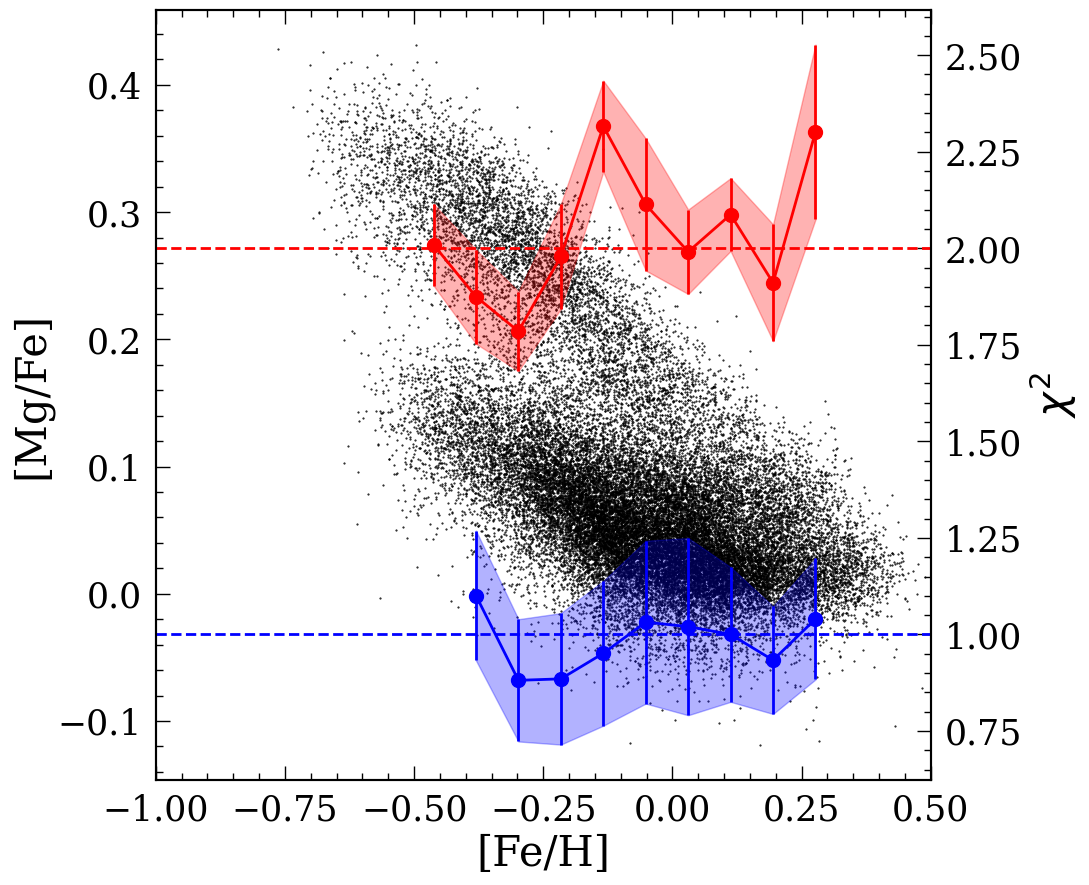

In [164]:
fehbinsmid = (fehbins[:-1]+fehbins[1:])/2

plt.plot(df['[Fe/H]'], df['[Mg/Fe]'], 'k.', markersize=1,
        zorder=1)
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')


chi2inn = np.array([np.median(pd.Series(allchi2_inn[i,:]).dropna()) for i in range(len(allchi2_inn[:,0]))])
chi2inn_err = np.array([np.std(pd.Series(allchi2_inn[i,:]).dropna()) for i in range(len(allchi2_inn[:,0]))])

chi2out = np.array([np.median(pd.Series(allchi2_out[i,:]).dropna()) for i in range(len(allchi2_out[:,0]))])
chi2out_err = np.array([np.std(pd.Series(allchi2_out[i,:]).dropna()) for i in range(len(allchi2_out[:,0]))])


plt.twinx()
medinn = np.median(chi2inn[chi2inn==chi2inn])
medout = np.median(chi2out[chi2out==chi2out])
plt.errorbar(fehbinsmid[:-1], chi2inn/medinn+1, yerr=chi2inn_err/medinn,
              fmt='r-o',markersize=10, zorder=100)
plt.errorbar(fehbinsmid[:-1], chi2out/medout, yerr=chi2out_err/medout,
              fmt='b-o', markersize=10, zorder=100)
plt.fill_between(fehbinsmid[:-1], (chi2inn+chi2inn_err)/medinn+1, y2=(chi2inn-chi2inn_err)/medinn+1,
                color='r', alpha=0.3)
plt.fill_between(fehbinsmid[:-1], (chi2out+chi2out_err)/medout, y2=(chi2out-chi2out_err)/medout,
                color='b', alpha=0.3)
plt.ylabel('normalized $χ^2$')
plt.plot([-1,0.5],[1,1],'b--')
plt.plot([-1,0.5],[2,2],'r--')
plt.xlim([-1,0.5])

"""plt.twinx()
plt.plot(fehbinsmid[:-1], nbs_inn, 'r--')
plt.plot(fehbinsmid[:-1], nbs_out, 'b--')
plt.ylabel('# of stars')"""





In [231]:
"""Rbinn = np.array([np.median(rb_inn[i,:]) for i in range(len(rb_inn[:,0]))])
Rbinn_err = np.array([np.std(rb_inn[i,:]) for i in range(len(rb_inn[:,0]))])

Rbout = np.array([np.median(rb_out[i,:]) for i in range(len(rb_out[:,0]))])
Rbout_err = np.array([np.std(rb_out[i,:]) for i in range(len(rb_out[:,0]))])

ageinn = np.array([np.median(age_inn[i,:]) for i in range(len(age_inn[:,0]))])
ageinn_err = np.array([np.std(age_inn[i,:]) for i in range(len(age_inn[:,0]))])

ageout = np.array([np.median(age_out[i,:]) for i in range(len(age_out[:,0]))])
ageout_err = np.array([np.std(age_out[i,:]) for i in range(len(age_out[:,0]))])

mgfeinn = np.array([np.median(mgfe_inn[i,:]) for i in range(len(mgfe_inn[:,0]))])
mgfeinn_err = np.array([np.std(mgfe_inn[i,:]) for i in range(len(mgfe_inn[:,0]))])

fehinn = np.array([np.median(feh_inn[i,:]) for i in range(len(feh_inn[:,0]))])
fehinn_err = np.array([np.std(feh_inn[i,:]) for i in range(len(feh_inn[:,0]))])

mgfeout = np.array([np.median(mgfe_out[i,:]) for i in range(len(mgfe_out[:,0]))])
mgfeout_err = np.array([np.std(mgfe_out[i,:]) for i in range(len(mgfe_out[:,0]))])

fehout = np.array([np.median(feh_out[i,:]) for i in range(len(feh_out[:,0]))])
fehout_err = np.array([np.std(feh_out[i,:]) for i in range(len(feh_out[:,0]))])

"""

'Rbinn = np.array([np.median(rb_inn[i,:]) for i in range(len(rb_inn[:,0]))])\nRbinn_err = np.array([np.std(rb_inn[i,:]) for i in range(len(rb_inn[:,0]))])\n\nRbout = np.array([np.median(rb_out[i,:]) for i in range(len(rb_out[:,0]))])\nRbout_err = np.array([np.std(rb_out[i,:]) for i in range(len(rb_out[:,0]))])\n\nageinn = np.array([np.median(age_inn[i,:]) for i in range(len(age_inn[:,0]))])\nageinn_err = np.array([np.std(age_inn[i,:]) for i in range(len(age_inn[:,0]))])\n\nageout = np.array([np.median(age_out[i,:]) for i in range(len(age_out[:,0]))])\nageout_err = np.array([np.std(age_out[i,:]) for i in range(len(age_out[:,0]))])\n\nmgfeinn = np.array([np.median(mgfe_inn[i,:]) for i in range(len(mgfe_inn[:,0]))])\nmgfeinn_err = np.array([np.std(mgfe_inn[i,:]) for i in range(len(mgfe_inn[:,0]))])\n\nfehinn = np.array([np.median(feh_inn[i,:]) for i in range(len(feh_inn[:,0]))])\nfehinn_err = np.array([np.std(feh_inn[i,:]) for i in range(len(feh_inn[:,0]))])\n\nmgfeout = np.array([np.medi

In [230]:
"""plt.figure()
plt.errorbar(mgfeinn, chi2inn, xerr=mgfeinn_err, yerr=chi2inn_err,fmt='ro',
            markersize=10)
plt.errorbar(mgfeout, chi2out, xerr=mgfeout_err, yerr=chi2out_err,fmt='bo',
            markersize=10)
plt.xlabel('mean [Mg/Fe] change')
plt.ylabel('$χ^2$')

plt.figure()
plt.errorbar(fehinn, chi2inn, xerr=fehinn_err, yerr=chi2inn_err,fmt='ro',
            markersize=10)
plt.errorbar(fehout, chi2out, xerr=fehout_err, yerr=chi2out_err,fmt='bo',
            markersize=10)
plt.xlabel('mean [Fe/H] change')
plt.ylabel('$χ^2$')"""

"plt.figure()\nplt.errorbar(mgfeinn, chi2inn, xerr=mgfeinn_err, yerr=chi2inn_err,fmt='ro',\n            markersize=10)\nplt.errorbar(mgfeout, chi2out, xerr=mgfeout_err, yerr=chi2out_err,fmt='bo',\n            markersize=10)\nplt.xlabel('mean [Mg/Fe] change')\nplt.ylabel('$χ^2$')\n\nplt.figure()\nplt.errorbar(fehinn, chi2inn, xerr=fehinn_err, yerr=chi2inn_err,fmt='ro',\n            markersize=10)\nplt.errorbar(fehout, chi2out, xerr=fehout_err, yerr=chi2out_err,fmt='bo',\n            markersize=10)\nplt.xlabel('mean [Fe/H] change')\nplt.ylabel('$χ^2$')"

## Let's do the same thing but in Rb bins, seperated in high- and low-[$\alpha$/Fe] disks

Danny suggested I also cut the transition stars in the high-[$\alpha$/Fe] disk, hence the high-[$\alpha$/Fe] disk does not cover the entire range.

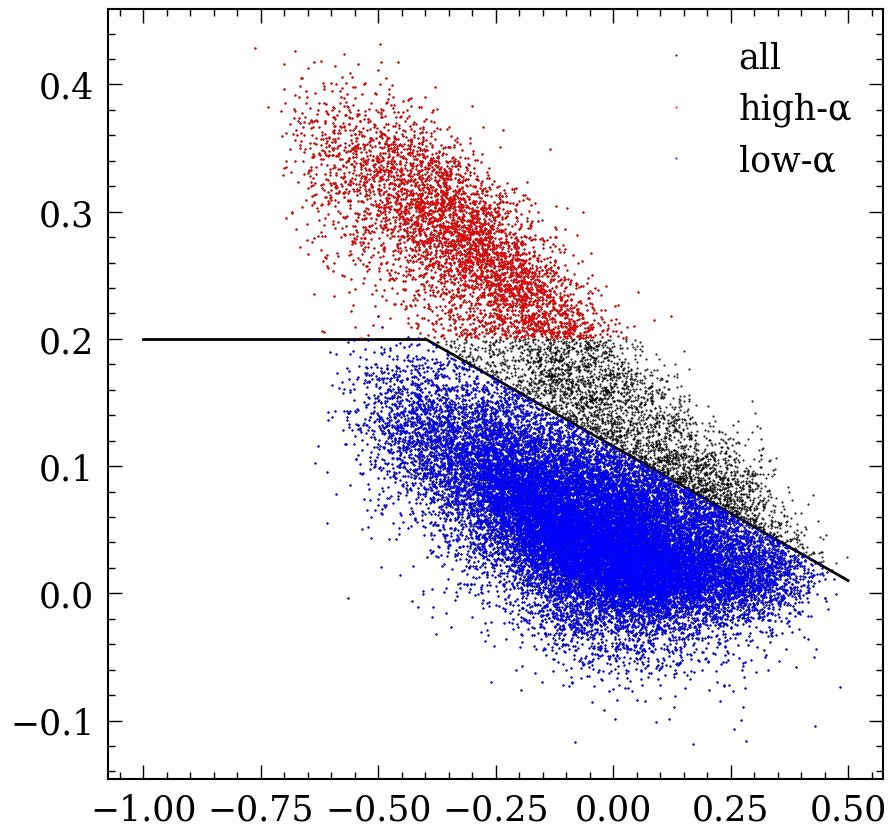

In [400]:
phl = fitpoints([-0.4,0.5],[0.2,0.01])

mha = ((df['[Fe/H]']<-0.5)&(df['[Mg/Fe]']>0.2))|((df['[Fe/H]']>=-0.5)&(df['[Mg/Fe]']>phl(df['[Fe/H]'])))
mla = ~mha
mha = (df['[Mg/Fe]']>0.2)

df_high = df[mha].reset_index(drop=True)
df_low = df[mla].reset_index(drop=True)

plt.plot([-0.4,0.5],[0.2,0.01],'k-')
plt.plot([-1,-0.4],[0.2,0.2],'k-')

plt.plot(df['[Fe/H]'],df['[Mg/Fe]'],'k.',markersize=1, label='all')
plt.plot(df_high['[Fe/H]'],df_high['[Mg/Fe]'],'r.',markersize=1, label='high-α')
plt.plot(df_low['[Fe/H]'],df_low['[Mg/Fe]'],'b.',markersize=1, label='low-α')
plt.legend(loc=1)

In [481]:
def get_diff(observed_mean,predicted_mean):
    result = np.zeros((len(observed_mean)))
    for indx, i in enumerate(observed_mean):
        result[indx] = ((i-predicted_mean[indx])**2)
    diff = np.sum((result))
    return diff



def pltdiff(df, df_high, df_low, Rbbin_high, Rbbin_low, Rbbin, diffvar = 'Rb', testtime=100):
    Nostars_high = []
    Nostars_low = []
    Nostars = []

    #Rbbin_high = np.linspace(0,8,9)
    #Rbbin_low = np.linspace(0,11,12)
    #Rbbin = np.linspace(0,11,12)

    for i in range(len(Rbbin_high)-1):
        df_high_sing = df_high.loc[(df_high[diffvar]>Rbbin_high[i])&(df_high[diffvar]<Rbbin_high[i+1])]
        print(diffvar+' range high_alpha:'+str(Rbbin_high[i])+'-'+str(Rbbin_high[i+1])+':'+'%d'%(len(df_high_sing)))
        Nostars_high.append(len(df_high_sing))
    print('\n')

    for i in range(len(Rbbin_low)-1):
        df_low_sing = df_low.loc[(df_low[diffvar]>Rbbin_low[i])&(df_low[diffvar]<Rbbin_low[i+1])]
        print(diffvar+' range low_alpha:'+str(Rbbin_low[i])+'-'+str(Rbbin_low[i+1])+':'+'%d'%(len(df_low_sing)))
        Nostars_low.append(len(df_low_sing))
    print('\n')

    for i in range(len(Rbbin)-1):
        df_sing = df.loc[(df[diffvar]>Rbbin[i])&(df[diffvar]<Rbbin[i+1])]
        print(diffvar+' range all:'+str(Rbbin[i])+'-'+str(Rbbin[i+1])+':'+'%d'%(len(df_sing)))
        Nostars.append(len(df_sing))


    Selstar_high = min(Nostars_high)
    Selstar_low = min(Nostars_low)
    Selstar = min(Nostars)
    print('\n\nSelect stars No: high %d, low %d, all %d'%(Selstar_high, Selstar_low, Selstar))

    allchi2_inn = np.zeros((len(Rbbin_high)-2,testtime))
    allchi2_out = np.zeros((len(Rbbin_low)-2,testtime))
    allchi2_all = np.zeros((len(Rbbin)-2,testtime))
    diff_inn = np.zeros((len(Rbbin_high)-2,testtime))
    diff_out = np.zeros((len(Rbbin_low)-2,testtime))
    diff_all = np.zeros((len(Rbbin)-2,testtime))



    rb_inn = np.zeros((len(Rbbin_high)-2,testtime))
    rb_out = np.zeros((len(Rbbin_low)-2,testtime))
    rb_all = np.zeros((len(Rbbin)-2,testtime))



    for j in trange(testtime):
        for i in range(len(Rbbin_high)-2):
            df_high_sing = df_high.loc[(df_high[diffvar]>Rbbin_high[i])&(df_high[diffvar]<Rbbin_high[i+1])]
            df_high_sing = df_high_sing.sample(n = Selstar_high)

            df_high_sing_2 = df_high.loc[(df_high[diffvar]>Rbbin_high[i+1])&(df_high[diffvar]<Rbbin_high[i+2])]
            df_high_sing_2 = df_high_sing_2.sample(n = Selstar_high)

            abun_inner_firstbox, abun_inner_firstbox_err, feh_inner_firstbox, feh_inner_firstbox_err = getdata(df_high_sing)
            abun_inner_secbox, abun_inner_secbox_err, feh_inner_secbox, feh_inner_secbox_err = getdata(df_high_sing_2)

            # calculate for two inner
            xfe_mean_inner_firstbox ,xfe_scatter_inner_firstbox ,xfe_meanerr_inner_firstbox = find_mean_scatter_norm(abun_inner_firstbox, abun_inner_firstbox_err, feh_inner_firstbox, feh_inner_firstbox_err, fehs_val = 0, delta_feh = 5 )
            xfe_mean_inner_secbox ,xfe_scatter_inner_secbox ,xfe_meanerr_inner_secbox = find_mean_scatter_norm(abun_inner_secbox, abun_inner_secbox_err, feh_inner_secbox, feh_inner_secbox_err, fehs_val = 0, delta_feh = 5)

            allchi2_inn[i,j] = get_chi2(xfe_mean_inner_firstbox, xfe_mean_inner_secbox, xfe_scatter_inner_firstbox, xfe_scatter_inner_secbox)
            diff_inn[i,j] = get_diff(xfe_mean_inner_firstbox, xfe_mean_inner_secbox)
            rb_inn[i,j] = np.mean(df_high_sing[diffvar])


    for j in trange(testtime):
        for i in range(len(Rbbin_low)-2):
            df_low_sing = df_low.loc[(df_low[diffvar]>Rbbin_low[i])&(df_low[diffvar]<Rbbin_low[i+1])]
            df_low_sing = df_low_sing.sample(n = Selstar_low)

            df_low_sing_2 = df_low.loc[(df_low[diffvar]>Rbbin_low[i+1])&(df_low[diffvar]<Rbbin_low[i+2])]
            df_low_sing_2 = df_low_sing_2.sample(n = Selstar_low)

            abun_inner_firstbox, abun_inner_firstbox_err, feh_inner_firstbox, feh_inner_firstbox_err = getdata(df_low_sing)
            abun_inner_secbox, abun_inner_secbox_err, feh_inner_secbox, feh_inner_secbox_err = getdata(df_low_sing_2)

            # calculate for two inner
            xfe_mean_inner_firstbox ,xfe_scatter_inner_firstbox ,xfe_meanerr_inner_firstbox = find_mean_scatter_norm(abun_inner_firstbox, abun_inner_firstbox_err, feh_inner_firstbox, feh_inner_firstbox_err, fehs_val = 0, delta_feh = 5 )
            xfe_mean_inner_secbox ,xfe_scatter_inner_secbox ,xfe_meanerr_inner_secbox = find_mean_scatter_norm(abun_inner_secbox, abun_inner_secbox_err, feh_inner_secbox, feh_inner_secbox_err, fehs_val = 0, delta_feh = 5)

            allchi2_out[i,j] = get_chi2(xfe_mean_inner_firstbox, xfe_mean_inner_secbox, xfe_scatter_inner_firstbox, xfe_scatter_inner_secbox)
            diff_out[i,j] = get_diff(xfe_mean_inner_firstbox, xfe_mean_inner_secbox)
            rb_out[i,j] = np.mean(df_low_sing[diffvar])


    for j in trange(testtime):
        for i in range(len(Rbbin)-2):
            df_sing = df.loc[(df[diffvar]>Rbbin[i])&(df[diffvar]<Rbbin[i+1])]
            df_sing = df_sing.sample(n = Selstar)

            df_sing_2 = df.loc[(df[diffvar]>Rbbin[i+1])&(df[diffvar]<Rbbin[i+2])]
            df_sing_2 = df_sing_2.sample(n = Selstar)

            abun_inner_firstbox, abun_inner_firstbox_err, feh_inner_firstbox, feh_inner_firstbox_err = getdata(df_sing)
            abun_inner_secbox, abun_inner_secbox_err, feh_inner_secbox, feh_inner_secbox_err = getdata(df_sing_2)

            # calculate for two inner
            xfe_mean_inner_firstbox ,xfe_scatter_inner_firstbox ,xfe_meanerr_inner_firstbox = find_mean_scatter_norm(abun_inner_firstbox, abun_inner_firstbox_err, feh_inner_firstbox, feh_inner_firstbox_err, fehs_val = 0, delta_feh = 5 )
            xfe_mean_inner_secbox ,xfe_scatter_inner_secbox ,xfe_meanerr_inner_secbox = find_mean_scatter_norm(abun_inner_secbox, abun_inner_secbox_err, feh_inner_secbox, feh_inner_secbox_err, fehs_val = 0, delta_feh = 5)

            allchi2_all[i,j] = get_chi2(xfe_mean_inner_firstbox, xfe_mean_inner_secbox, xfe_scatter_inner_firstbox, xfe_scatter_inner_secbox)
            diff_all[i,j] = get_diff(xfe_mean_inner_firstbox, xfe_mean_inner_secbox)
            rb_all[i,j] = np.mean(df_sing[diffvar])
            
    fehbinsmid = (Rbbin[:-1]+Rbbin[1:])/2
    fehbinsmid_low = (Rbbin_low[:-1]+Rbbin_low[1:])/2
    fehbinsmid_high = (Rbbin_high[:-1]+Rbbin_high[1:])/2


    chi2inn = np.array([np.median(pd.Series(allchi2_inn[i,:]).dropna()) for i in range(len(allchi2_inn[:,0]))])
    chi2inn_err = np.array([np.std(pd.Series(allchi2_inn[i,:]).dropna()) for i in range(len(allchi2_inn[:,0]))])

    chi2out = np.array([np.median(pd.Series(allchi2_out[i,:]).dropna()) for i in range(len(allchi2_out[:,0]))])
    chi2out_err = np.array([np.std(pd.Series(allchi2_out[i,:]).dropna()) for i in range(len(allchi2_out[:,0]))])

    chi2all = np.array([np.median(pd.Series(allchi2_all[i,:]).dropna()) for i in range(len(allchi2_all[:,0]))])
    chi2all_err = np.array([np.std(pd.Series(allchi2_all[i,:]).dropna()) for i in range(len(allchi2_all[:,0]))])


    medinn = np.median(chi2inn[chi2inn==chi2inn])
    medout = np.median(chi2out[chi2out==chi2out])
    medall = np.median(chi2all[chi2all==chi2all])

    plt.errorbar(fehbinsmid_high[:-1], chi2inn, yerr=chi2inn_err,
                  fmt='r-o',markersize=10, zorder=100, label='high-[α/Fe]')
    plt.errorbar(fehbinsmid_low[:-1], chi2out, yerr=chi2out_err,
                  fmt='b-o', markersize=10, zorder=100, label='low-[α/Fe]')
    plt.errorbar(fehbinsmid[:-1], chi2all, yerr=chi2all_err,
                  fmt='k-o', markersize=10, zorder=100, label='All')

    plt.fill_between(fehbinsmid_high[:-1], (chi2inn+chi2inn_err), y2=(chi2inn-chi2inn_err),
                    color='r', alpha=0.3)
    plt.fill_between(fehbinsmid_low[:-1], (chi2out+chi2out_err), y2=(chi2out-chi2out_err),
                    color='b', alpha=0.3)
    plt.fill_between(fehbinsmid[:-1], (chi2all+chi2all_err), y2=(chi2all-chi2all_err),
                    color='k', alpha=0.3)

    plt.ylabel('$χ^2$')
    #plt.plot([-1,0.5],[1,1],'b--')
    #plt.plot([-1,0.5],[2,2],'r--')
    plt.xlabel(diffvar)
    plt.legend(loc=2)
    """plt.twinx()
    plt.plot(fehbinsmid[:-1], nbs_inn, 'r--')
    plt.plot(fehbinsmid[:-1], nbs_out, 'b--')
    plt.ylabel('# of stars')"""
    
    df_res_low = pd.DataFrame(np.array((fehbinsmid_low[:-1], chi2out, chi2out_err)).T,
                         columns=['midbin_low','chisq_low','chisq_low_err'])
    df_res_high = pd.DataFrame(np.array((fehbinsmid_high[:-1], chi2inn, chi2inn_err)).T,
                         columns=['midbin_high','chisq_high','chisq_high_err'])
    df_res = pd.DataFrame(np.array((fehbinsmid[:-1], chi2all, chi2all_err)).T,
                         columns=['midbin_all','chisq_all','chisq_all_err'])
    
    
    return df_res_low, df_res_high, df_res









    

- low-[$\alpha$/Fe] increase in the inner disk (two formation channel or Sgr.?), increase in the SN and beyond (GSE?)
- high-[$\alpha$/Fe] increase just inside the SN, what can this mean?

Rb range 0.0-1.0:122
Rb range 1.0-2.0:153
Rb range 2.0-3.0:239
Rb range 3.0-4.0:350
Rb range 4.0-5.0:669
Rb range 5.0-6.0:1140
Rb range 6.0-7.0:1099
Rb range 7.0-8.0:467


Rb range 0.0-1.0:347
Rb range 1.0-2.0:810
Rb range 2.0-3.0:1624
Rb range 3.0-4.0:2865
Rb range 4.0-5.0:4105
Rb range 5.0-6.0:4922
Rb range 6.0-7.0:4852
Rb range 7.0-8.0:3697
Rb range 8.0-9.0:2252
Rb range 9.0-10.0:837
Rb range 10.0-11.0:242


Rb range 0.0-1.0:715
Rb range 1.0-2.0:1336
Rb range 2.0-3.0:2405
Rb range 3.0-4.0:3774
Rb range 4.0-5.0:5241
Rb range 5.0-6.0:6283
Rb range 6.0-7.0:6021
Rb range 7.0-8.0:4182
Rb range 8.0-9.0:2408
Rb range 9.0-10.0:910
Rb range 10.0-11.0:308


Select stars No: high 122, low 242, all 308


100%|█████████████████████████████████████████| 100/100 [24:20<00:00, 14.61s/it]


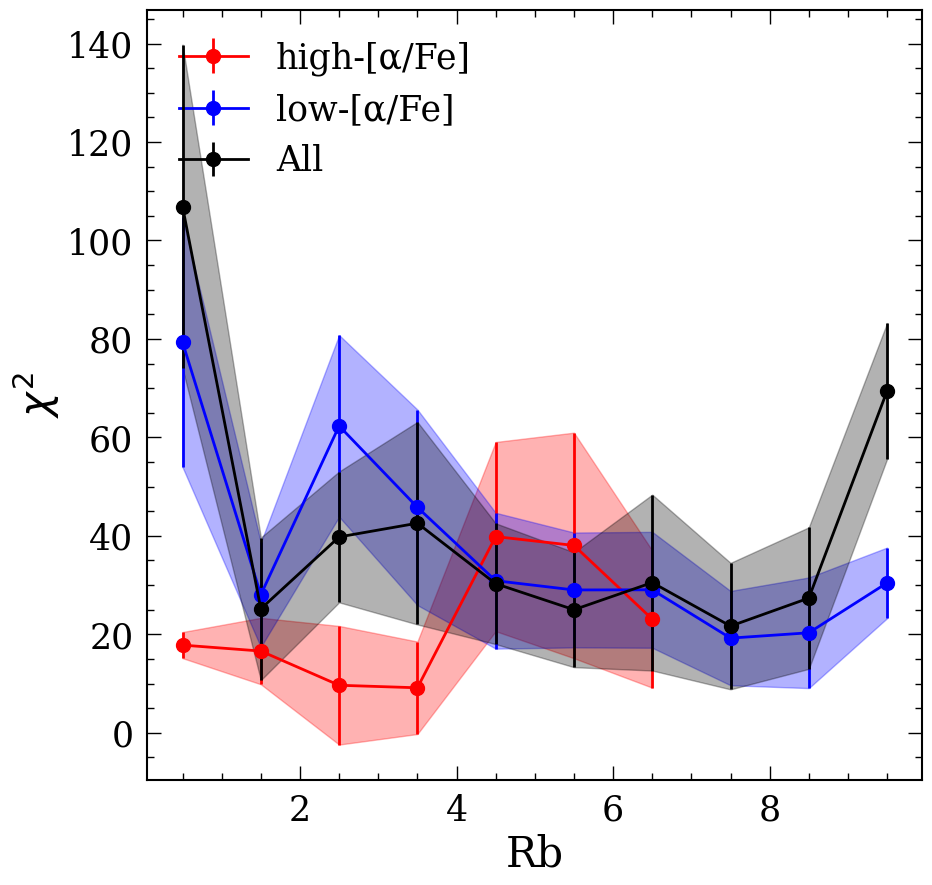

In [278]:
df_rb_low, df_rb_high, df_rb = pltdiff(df, df_high, df_low, np.linspace(0,8,9), np.linspace(0,11,12), 
                np.linspace(0,11,12), diffvar = 'Rb', testtime=100)




In [279]:
df_rb_low.to_pickle('Rb_comp_low.pkl')
df_rb_high.to_pickle('Rb_comp_high.pkl')
df_rb .to_pickle('Rb_comp_all.pkl')


## Same thing but age bins

Few things to point out:
- high-$\alpha$ $\chi^2$ increased at ~11 Gyr, matching the merger time of GSE from Xiang & Rix 2022 paper
- $\chi^2$ increasefrom ~9 Gyr, indeciating the bi-modality started to form. The peaks at 7.5, 4 Gyr, and 3 Gyr-now could indicate some sort of merger effect? But the overall trend keeps increasing so not sure if that is true.

Age range 4.0-5.0:131
Age range 5.0-6.0:398
Age range 6.0-7.0:561
Age range 7.0-8.0:652
Age range 8.0-9.0:867
Age range 9.0-10.0:858
Age range 10.0-11.0:509
Age range 11.0-12.0:267
Age range 12.0-13.0:113


Age range 0.0-1.0:117
Age range 1.0-2.0:1759
Age range 2.0-3.0:3624
Age range 3.0-4.0:5176
Age range 4.0-5.0:4947
Age range 5.0-6.0:3745
Age range 6.0-7.0:2796
Age range 7.0-8.0:1915
Age range 8.0-9.0:1296
Age range 9.0-10.0:836
Age range 10.0-11.0:452


Age range 1.0-2.0:1837
Age range 2.0-3.0:3756
Age range 3.0-4.0:5363
Age range 4.0-5.0:5244
Age range 5.0-6.0:4410
Age range 6.0-7.0:3650
Age range 7.0-8.0:2994
Age range 8.0-9.0:2634
Age range 9.0-10.0:2086
Age range 10.0-11.0:1312
Age range 11.0-12.0:761


Select stars No: high 113, low 117, all 761


100%|█████████████████████████████████████████| 100/100 [18:02<00:00, 10.83s/it]


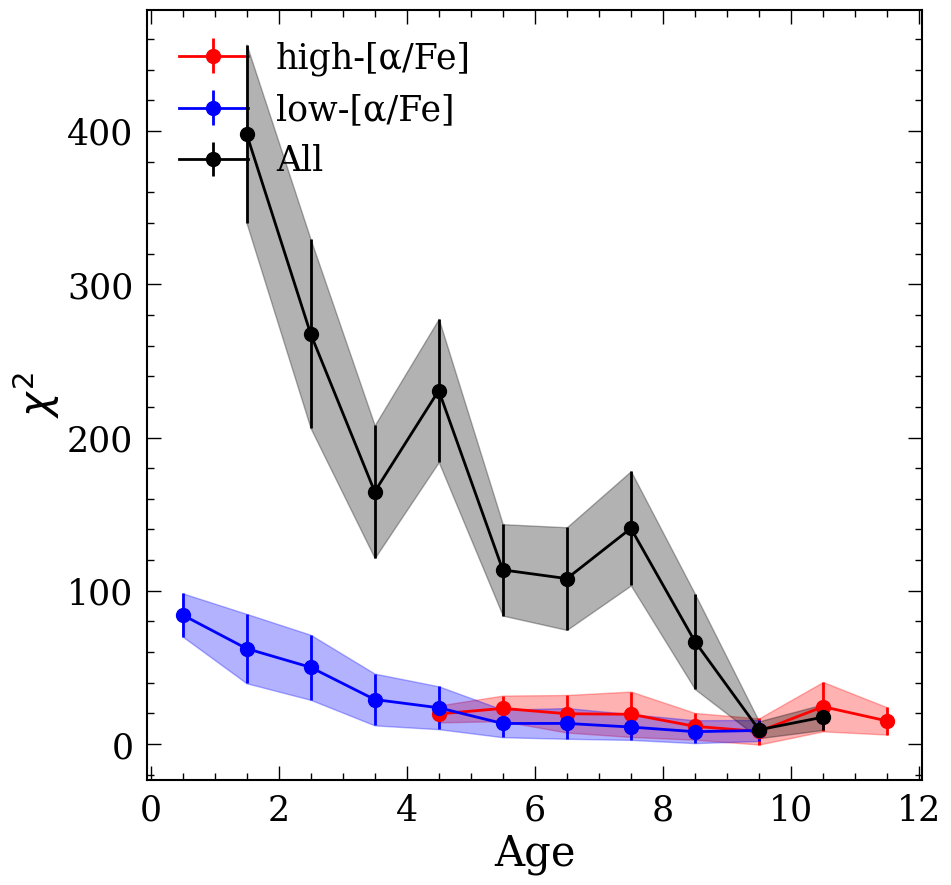

In [280]:
df_age_low, df_age_high, df_age = pltdiff(df, df_high, df_low, np.linspace(4,13,10), np.linspace(0,11,12), 
                np.linspace(1,12,12), diffvar = 'Age', testtime=100)



In [281]:
df_age_low.to_pickle('Age_comp_low.pkl')
df_age_high.to_pickle('Age_comp_high.pkl')
df_age .to_pickle('Age_comp_all.pkl')



# Simulation

In [457]:
import pynbody as pb
import numpy as np
import matplotlib.pylab as plt
import pynbody.filt as filt
from pynbody.snapshot.tipsy import TipsySnap
import os, pickle

#Asplund+2009
# solar abundances from table 1, abundance of element x
# converted to mass fractions using abundance x and atomic mass m:
# XSOLX = 10**(x-12)*m*XSOLH
XSOLH = 0.74
#XSOLHe =  
XSOLFe = 1.31e-3
XSOLO = 5.8E-3
XSOLC = 2.39e-3
XSOLN = 7e-4
XSOLNe = 1.26e-3
XSOLMg = 7.16e-4
XSOLSi = 6.7e-4
XSOLS = 3.1e-4
XSOLAl = 5.6e-5
XSOLCa = 6.48e-5
XSOLNa = 2.96e-5
XSOLZr = 2.566e-8
XSOLY = 1.067e-8
XSOLV = 3.21e-7
XSOLTi = 3.16e-6
XSOLSr = 4.8e-8
XSOLSc = 4.7e-8
XSOLNi = 7.21e-5
XSOLMn = 1.1e-5
XSOLLa = 1.29e-9
XSOLEu = 3.7e-10
XSOLCr = 1.68e-5
XSOLCo = 4.26e-6
XSOLBa = 1.54e-8


@TipsySnap.derived_quantity
def hetot(self):
    """Helium mass fraction"""
    return self['HeMassFrac_AGB'] + self['HeMassFrac_SNIA'] + self['HeMassFrac_SNII']

@TipsySnap.derived_quantity
def feh(self):
    """Iron abundance [Fe/H] derived from tipsy array FeMassFrac, with solar values from Asplund et al 09"""
    minfe = np.amin(self['FeMassFrac_AGB'][np.where(self['FeMassFrac_AGB'] > 0)])
    minfeI = np.amin(self['FeMassFrac_SNIA'][np.where(self['FeMassFrac_SNIA'] > 0)])
    minfeII = np.amin(self['FeMassFrac_SNII'][np.where(self['FeMassFrac_SNII'] > 0)])
    self['FeMassFrac_AGB'][np.where(self['FeMassFrac_AGB'] == 0)] = minfe
    self['FeMassFrac_SNIA'][np.where(self['FeMassFrac_SNIA'] == 0)] = minfeI
    self['FeMassFrac_SNII'][np.where(self['FeMassFrac_SNII'] == 0)] = minfeII
    return np.log10((self['FeMassFrac_AGB']+self['FeMassFrac_SNIA']+self['FeMassFrac_SNII']) / self['hydrogen']) - np.log10(XSOLFe / XSOLH)

                                                                         
@TipsySnap.derived_quantity
def ch(self):
    """Iron abundance [C/H] derived from tipsy array CMassFrac, with solar
    values from Asplund et al 09"""
    minfe = np.amin(self['CMassFrac_AGB'][np.where(self['CMassFrac_AGB'] > 0)])
    minfeI = np.amin(self['CMassFrac_SNIA'][np.where(self['CMassFrac_SNIA'] > 0)])
    minfeII = np.amin(self['CMassFrac_SNII'][np.where(self['CMassFrac_SNII'] > 0)])
    self['CMassFrac_AGB'][np.where(self['CMassFrac_AGB'] == 0)] = minfe
    self['CMassFrac_SNIA'][np.where(self['CMassFrac_SNIA'] == 0)] = minfeI
    self['CMassFrac_SNII'][np.where(self['CMassFrac_SNII'] == 0)] = minfeII
    
    return np.log10((self['CMassFrac_AGB']+self['CMassFrac_SNIA']+self['CMassFrac_SNII']) / self['hydrogen']) - np.log10(XSOLC / XSOLH)

@TipsySnap.derived_quantity
def oh(self):
    """Iron abundance [O/H] derived from tipsy array OMassFrac, with solar
    values from Asplund et al 09"""
    minfe = np.amin(self['OMassFrac_AGB'][np.where(self['OMassFrac_AGB'] > 0)])
    minfeI = np.amin(self['OMassFrac_SNIA'][np.where(self['OMassFrac_SNIA'] > 0)])
    minfeII = np.amin(self['OMassFrac_SNII'][np.where(self['OMassFrac_SNII'] > 0)])
    self['OMassFrac_AGB'][np.where(self['OMassFrac_AGB'] == 0)] = minfe
    self['OMassFrac_SNIA'][np.where(self['OMassFrac_SNIA'] == 0)] = minfeI
    self['OMassFrac_SNII'][np.where(self['OMassFrac_SNII'] == 0)] = minfeII
    
    return np.log10((self['OMassFrac_AGB']+self['OMassFrac_SNIA']+self['OMassFrac_SNII']) / self['hydrogen']) - np.log10(XSOLO / XSOLH)


@TipsySnap.derived_quantity
def sih(self):
    """Iron abundance [Si/H] derived from tipsy array SiMassFrac, with solar
    values from Asplund et al 09"""
    minfe = np.amin(self['SiMassFrac_AGB'][np.where(self['SiMassFrac_AGB'] > 0)])
    minfeI = np.amin(self['SiMassFrac_SNIA'][np.where(self['SiMassFrac_SNIA'] > 0)])
    minfeII = np.amin(self['SiMassFrac_SNII'][np.where(self['SiMassFrac_SNII'] > 0)])
    self['SiMassFrac_AGB'][np.where(self['SiMassFrac_AGB'] == 0)] = minfe
    self['SiMassFrac_SNIA'][np.where(self['SiMassFrac_SNIA'] == 0)] = minfeI
    self['SiMassFrac_SNII'][np.where(self['SiMassFrac_SNII'] == 0)] = minfeII
    
    return np.log10((self['SiMassFrac_AGB']+self['SiMassFrac_SNIA']+self['SiMassFrac_SNII']) / self['hydrogen']) - np.log10(XSOLSi / XSOLH)


@TipsySnap.derived_quantity
def mgh(self):
    """Iron abundance [Mg/H] derived from tipsy array MgMassFrac, with solar
    values from Asplund et al 09"""
    minfe = np.amin(self['MgMassFrac_AGB'][np.where(self['MgMassFrac_AGB'] > 0)])
    minfeI = np.amin(self['MgMassFrac_SNIA'][np.where(self['MgMassFrac_SNIA'] > 0)])
    minfeII = np.amin(self['MgMassFrac_SNII'][np.where(self['MgMassFrac_SNII'] > 0)])
    self['MgMassFrac_AGB'][np.where(self['MgMassFrac_AGB'] == 0)] = minfe
    self['MgMassFrac_SNIA'][np.where(self['MgMassFrac_SNIA'] == 0)] = minfeI
    self['MgMassFrac_SNII'][np.where(self['MgMassFrac_SNII'] == 0)] = minfeII
    
    return np.log10((self['MgMassFrac_AGB']+self['MgMassFrac_SNIA']+self['MgMassFrac_SNII']) / self['hydrogen']) - np.log10(XSOLMg / XSOLH)


@TipsySnap.derived_quantity
def sh(self):
    """Iron abundance [S/H] derived from tipsy array SMassFrac, with solar
    values from Asplund et al 09"""
    minfe = np.amin(self['SMassFrac_AGB'][np.where(self['SMassFrac_AGB'] > 0)])
    minfeI = np.amin(self['SMassFrac_SNIA'][np.where(self['SMassFrac_SNIA'] > 0)])
    minfeII = np.amin(self['SMassFrac_SNII'][np.where(self['SMassFrac_SNII'] > 0)])
    self['SMassFrac_AGB'][np.where(self['SMassFrac_AGB'] == 0)] = minfe
    self['SMassFrac_SNIA'][np.where(self['SMassFrac_SNIA'] == 0)] = minfeI
    self['SMassFrac_SNII'][np.where(self['SMassFrac_SNII'] == 0)] = minfeII
    
    return np.log10((self['SMassFrac_AGB']+self['SMassFrac_SNIA']+self['SMassFrac_SNII']) / self['hydrogen']) - np.log10(XSOLS / XSOLH)


@TipsySnap.derived_quantity
def ofe(self):
    """Oxygen-to-iron ratio [O/Fe] derived from tipsy arrays OxMassFrac and FeMassFrac
    with solar values from Asplund et al 09"""
    minfe = np.amin(self['OMassFrac_AGB'][np.where(self['OMassFrac_AGB'] > 0)])
    minfeI = np.amin(self['OMassFrac_SNIA'][np.where(self['OMassFrac_SNIA'] > 0)])
    minfeII = np.amin(self['OMassFrac_SNII'][np.where(self['OMassFrac_SNII'] > 0)])
    self['OMassFrac_AGB'][np.where(self['OMassFrac_AGB'] == 0)] = minfe
    self['OMassFrac_SNIA'][np.where(self['OMassFrac_SNIA'] == 0)] = minfeI
    self['OMassFrac_SNII'][np.where(self['OMassFrac_SNII'] == 0)] = minfeII
    
    return np.log10((self['OMassFrac_AGB']+self['OMassFrac_SNIA']+self['OMassFrac_SNII']) / (self['FeMassFrac_AGB']+self['FeMassFrac_SNIA']+self['FeMassFrac_SNII'])) - np.log10(XSOLO / XSOLFe)


@TipsySnap.derived_quantity
def cfe(self):
    """Carbon-to-iron ratio [O/Fe] derived from tipsy arrays OxMassFrac and FeMassFrac
    with solar values from Asplund et al 09"""
    minfe = np.amin(self['CMassFrac_AGB'][np.where(self['CMassFrac_AGB'] > 0)])
    minfeI = np.amin(self['CMassFrac_SNIA'][np.where(self['CMassFrac_SNIA'] > 0)])
    minfeII = np.amin(self['CMassFrac_SNII'][np.where(self['CMassFrac_SNII'] > 0)])
    self['CMassFrac_AGB'][np.where(self['CMassFrac_AGB'] == 0)] = minfe
    self['CMassFrac_SNIA'][np.where(self['CMassFrac_SNIA'] == 0)] = minfeI
    self['CMassFrac_SNII'][np.where(self['CMassFrac_SNII'] == 0)] = minfeII
    
    return np.log10((self['CMassFrac_AGB']+self['CMassFrac_SNIA']+self['CMassFrac_SNII']) / (self['FeMassFrac_AGB']+self['FeMassFrac_SNIA']+self['FeMassFrac_SNII'])) - np.log10(XSOLC / XSOLFe)


@TipsySnap.derived_quantity
def cafe(self):
    """Carbon-to-iron ratio [O/Fe] derived from tipsy arrays OxMassFrac and FeMassFrac
    with solar values from Asplund et al 09"""
    minfe = np.amin(self['CaMassFrac_AGB'][np.where(self['CaMassFrac_AGB'] > 0)])
    minfeI = np.amin(self['CaMassFrac_SNIA'][np.where(self['CaMassFrac_SNIA'] > 0)])
    minfeII = np.amin(self['CaMassFrac_SNII'][np.where(self['CaMassFrac_SNII'] > 0)])
    self['CaMassFrac_AGB'][np.where(self['CaMassFrac_AGB'] == 0)] = minfe
    self['CaMassFrac_SNIA'][np.where(self['CaMassFrac_SNIA'] == 0)] = minfeI
    self['CaMassFrac_SNII'][np.where(self['CaMassFrac_SNII'] == 0)] = minfeII
    
    return np.log10((self['CaMassFrac_AGB']+self['CaMassFrac_SNIA']+self['CaMassFrac_SNII']) / (self['FeMassFrac_AGB']+self['FeMassFrac_SNIA']+self['FeMassFrac_SNII'])) - np.log10(XSOLCa / XSOLFe)


@TipsySnap.derived_quantity
def alfe(self):
    """Carbon-to-iron ratio [O/Fe] derived from tipsy arrays OxMassFrac and FeMassFrac
    with solar values from Asplund et al 09"""
    minfe = np.amin(self['AlMassFrac_AGB'][np.where(self['AlMassFrac_AGB'] > 0)])
    minfeI = np.amin(self['AlMassFrac_SNIA'][np.where(self['AlMassFrac_SNIA'] > 0)])
    minfeII = np.amin(self['AlMassFrac_SNII'][np.where(self['AlMassFrac_SNII'] > 0)])
    self['AlMassFrac_AGB'][np.where(self['AlMassFrac_AGB'] == 0)] = minfe
    self['AlMassFrac_SNIA'][np.where(self['AlMassFrac_SNIA'] == 0)] = minfeI
    self['AlMassFrac_SNII'][np.where(self['AlMassFrac_SNII'] == 0)] = minfeII
    
    return np.log10((self['AlMassFrac_AGB']+self['AlMassFrac_SNIA']+self['AlMassFrac_SNII']) / (self['FeMassFrac_AGB']+self['FeMassFrac_SNIA']+self['FeMassFrac_SNII'])) - np.log10(XSOLAl / XSOLFe)


@TipsySnap.derived_quantity
def mgfe(self):
    """Carbon-to-iron ratio [O/Fe] derived from tipsy arrays OxMassFrac and FeMassFrac
    with solar values from Asplund et al 09"""
    minfe = np.amin(self['MgMassFrac_AGB'][np.where(self['MgMassFrac_AGB'] > 0)])
    minfeI = np.amin(self['MgMassFrac_SNIA'][np.where(self['MgMassFrac_SNIA'] > 0)])
    minfeII = np.amin(self['MgMassFrac_SNII'][np.where(self['MgMassFrac_SNII'] > 0)])
    self['MgMassFrac_AGB'][np.where(self['MgMassFrac_AGB'] == 0)] = minfe
    self['MgMassFrac_SNIA'][np.where(self['MgMassFrac_SNIA'] == 0)] = minfeI
    self['MgMassFrac_SNII'][np.where(self['MgMassFrac_SNII'] == 0)] = minfeII
    
    return np.log10((self['MgMassFrac_AGB']+self['MgMassFrac_SNIA']+self['MgMassFrac_SNII']) / (self['FeMassFrac_AGB']+self['FeMassFrac_SNIA']+self['FeMassFrac_SNII'])) - np.log10(XSOLMg / XSOLFe)


@TipsySnap.derived_quantity
def sfe(self):
    """Sulfur-to-iron ratio [S/Fe] derived from tipsy arrays OxMassFrac and FeMassFrac
    with solar values from Asplund et al 09"""
    minfe = np.amin(self['SMassFrac_AGB'][np.where(self['SMassFrac_AGB'] > 0)])
    minfeI = np.amin(self['SMassFrac_SNIA'][np.where(self['SMassFrac_SNIA'] > 0)])
    minfeII = np.amin(self['SMassFrac_SNII'][np.where(self['SMassFrac_SNII'] > 0)])
    self['SMassFrac_AGB'][np.where(self['SMassFrac_AGB'] == 0)] = minfe
    self['SMassFrac_SNIA'][np.where(self['SMassFrac_SNIA'] == 0)] = minfeI
    self['SMassFrac_SNII'][np.where(self['SMassFrac_SNII'] == 0)] = minfeII
    
    return np.log10((self['SMassFrac_AGB']+self['SMassFrac_SNIA']+self['SMassFrac_SNII']) / (self['FeMassFrac_AGB']+self['FeMassFrac_SNIA']+self['FeMassFrac_SNII'])) - np.log10(XSOLS / XSOLFe)


@TipsySnap.derived_quantity
def sife(self):
    """Silicon-to-iron ratio [Si/Fe] derived from tipsy arrays SiMassFrac and FeMassFrac
    with solar values from Asplund et al 09"""
    minfe = np.amin(self['SiMassFrac_AGB'][np.where(self['SiMassFrac_AGB'] > 0)])
    minfeI = np.amin(self['SiMassFrac_SNIA'][np.where(self['SiMassFrac_SNIA'] > 0)])
    minfeII = np.amin(self['SiMassFrac_SNII'][np.where(self['SiMassFrac_SNII'] > 0)])
    self['SiMassFrac_AGB'][np.where(self['SiMassFrac_AGB'] == 0)] = minfe
    self['SiMassFrac_SNIA'][np.where(self['SiMassFrac_SNIA'] == 0)] = minfeI
    self['SiMassFrac_SNII'][np.where(self['SiMassFrac_SNII'] == 0)] = minfeII
    
    return np.log10((self['SiMassFrac_AGB']+self['SiMassFrac_SNIA']+self['SiMassFrac_SNII']) / (self['FeMassFrac_AGB']+self['FeMassFrac_SNIA']+self['FeMassFrac_SNII'])) - np.log10(XSOLSi / XSOLFe)


@TipsySnap.derived_quantity
def nfe(self):
    """Carbon-to-iron ratio [O/Fe] derived from tipsy arrays OxMassFrac and FeMassFrac
    with solar values from Asplund et al 09"""
    minfe = np.amin(self['NMassFrac_AGB'][np.where(self['NMassFrac_AGB'] > 0)])
    minfeI = np.amin(self['NMassFrac_SNIA'][np.where(self['NMassFrac_SNIA'] > 0)])
    minfeII = np.amin(self['NMassFrac_SNII'][np.where(self['NMassFrac_SNII'] > 0)])
    self['NMassFrac_AGB'][np.where(self['NMassFrac_AGB'] == 0)] = minfe
    self['NMassFrac_SNIA'][np.where(self['NMassFrac_SNIA'] == 0)] = minfeI
    self['NMassFrac_SNII'][np.where(self['NMassFrac_SNII'] == 0)] = minfeII
    
    return np.log10((self['NMassFrac_AGB']+self['NMassFrac_SNIA']+self['NMassFrac_SNII']) / (self['FeMassFrac_AGB']+self['FeMassFrac_SNIA']+self['FeMassFrac_SNII'])) - np.log10(XSOLN / XSOLFe)


@TipsySnap.derived_quantity
def nafe(self):
    """Carbon-to-iron ratio [O/Fe] derived from tipsy arrays OxMassFrac and FeMassFrac
    with solar values from Asplund et al 09"""
    minfe = np.amin(self['NaMassFrac_AGB'][np.where(self['NaMassFrac_AGB'] > 0)])
    minfeI = np.amin(self['NaMassFrac_SNIA'][np.where(self['NaMassFrac_SNIA'] > 0)])
    minfeII = np.amin(self['NaMassFrac_SNII'][np.where(self['NaMassFrac_SNII'] > 0)])
    self['NaMassFrac_AGB'][np.where(self['NaMassFrac_AGB'] == 0)] = minfe
    self['NaMassFrac_SNIA'][np.where(self['NaMassFrac_SNIA'] == 0)] = minfeI
    self['NaMassFrac_SNII'][np.where(self['NaMassFrac_SNII'] == 0)] = minfeII
    
    return np.log10((self['NaMassFrac_AGB']+self['NaMassFrac_SNIA']+self['NaMassFrac_SNII']) / (self['FeMassFrac_AGB']+self['FeMassFrac_SNIA']+self['FeMassFrac_SNII'])) - np.log10(XSOLNa / XSOLFe)


@TipsySnap.derived_quantity
def nefe(self):
    """Carbon-to-iron ratio [O/Fe] derived from tipsy arrays OxMassFrac and FeMassFrac
    with solar values from Asplund et al 09"""
    minfe = np.amin(self['NeMassFrac_AGB'][np.where(self['NeMassFrac_AGB'] > 0)])
    minfeI = np.amin(self['NeMassFrac_SNIA'][np.where(self['NeMassFrac_SNIA'] > 0)])
    minfeII = np.amin(self['NeMassFrac_SNII'][np.where(self['NeMassFrac_SNII'] > 0)])
    self['NeMassFrac_AGB'][np.where(self['NeMassFrac_AGB'] == 0)] = minfe
    self['NeMassFrac_SNIA'][np.where(self['NeMassFrac_SNIA'] == 0)] = minfeI
    self['NeMassFrac_SNII'][np.where(self['NeMassFrac_SNII'] == 0)] = minfeII
    
    return np.log10((self['NeMassFrac_AGB']+self['NeMassFrac_SNIA']+self['NeMassFrac_SNII']) / (self['FeMassFrac_AGB']+self['FeMassFrac_SNIA']+self['FeMassFrac_SNII'])) - np.log10(XSOLNe / XSOLFe)


@TipsySnap.derived_quantity
def tife(self):
    """Titanium-to-iron ratio [Ti/Fe] derived from tipsy arrays TiMassFrac and FeMassFrac
    with solar values from Asplund et al 09"""
    minfe = np.amin(self['TiMassFrac_AGB'][np.where(self['TiMassFrac_AGB'] > 0)])
    minfeI = np.amin(self['TiMassFrac_SNIA'][np.where(self['TiMassFrac_SNIA'] > 0)])
    minfeII = np.amin(self['TiMassFrac_SNII'][np.where(self['TiMassFrac_SNII'] > 0)])
    self['TiMassFrac_AGB'][np.where(self['TiMassFrac_AGB'] == 0)] = minfe
    self['TiMassFrac_SNIA'][np.where(self['TiMassFrac_SNIA'] == 0)] = minfeI
    self['TiMassFrac_SNII'][np.where(self['TiMassFrac_SNII'] == 0)] = minfeII
    
    return np.log10((self['TiMassFrac_AGB']+self['TiMassFrac_SNIA']+self['TiMassFrac_SNII']) / (self['FeMassFrac_AGB']+self['FeMassFrac_SNIA']+self['FeMassFrac_SNII'])) - np.log10(XSOLTi / XSOLFe)


@TipsySnap.derived_quantity
def scfe(self):
    """Scandium-to-iron ratio [Sc/Fe] derived from tipsy arrays ScMassFrac and FeMassFrac
    with solar values from Asplund et al 09"""
    minfe = np.amin(self['ScMassFrac_AGB'][np.where(self['ScMassFrac_AGB'] > 0)])
    minfeI = np.amin(self['ScMassFrac_SNIA'][np.where(self['ScMassFrac_SNIA'] > 0)])
    minfeII = np.amin(self['ScMassFrac_SNII'][np.where(self['ScMassFrac_SNII'] > 0)])
    self['ScMassFrac_AGB'][np.where(self['ScMassFrac_AGB'] == 0)] = minfe
    self['ScMassFrac_SNIA'][np.where(self['ScMassFrac_SNIA'] == 0)] = minfeI
    self['ScMassFrac_SNII'][np.where(self['ScMassFrac_SNII'] == 0)] = minfeII
    
    return np.log10((self['ScMassFrac_AGB']+self['ScMassFrac_SNIA']+self['ScMassFrac_SNII']) / (self['FeMassFrac_AGB']+self['FeMassFrac_SNIA']+self['FeMassFrac_SNII'])) - np.log10(XSOLSc / XSOLFe)


@TipsySnap.derived_quantity
def vfe(self):
    """Vanadium-to-iron ratio [V/Fe] derived from tipsy arrays VMassFrac and FeMassFrac
    with solar values from Asplund et al 09"""
    minfe = np.amin(self['VMassFrac_AGB'][np.where(self['VMassFrac_AGB'] > 0)])
    minfeI = np.amin(self['VMassFrac_SNIA'][np.where(self['VMassFrac_SNIA'] > 0)])
    minfeII = np.amin(self['VMassFrac_SNII'][np.where(self['VMassFrac_SNII'] > 0)])
    self['VMassFrac_AGB'][np.where(self['VMassFrac_AGB'] == 0)] = minfe
    self['VMassFrac_SNIA'][np.where(self['VMassFrac_SNIA'] == 0)] = minfeI
    self['VMassFrac_SNII'][np.where(self['VMassFrac_SNII'] == 0)] = minfeII
    
    return np.log10((self['VMassFrac_AGB']+self['VMassFrac_SNIA']+self['VMassFrac_SNII']) / (self['FeMassFrac_AGB']+self['FeMassFrac_SNIA']+self['FeMassFrac_SNII'])) - np.log10(XSOLV / XSOLFe)


@TipsySnap.derived_quantity
def alphafe(self):
    """Alpha-to-iron ratio [alpha/Fe] derived from tipsy arrays MassFrac and FeMassFrac
    with solar values from Asplund et al 09 """
    
    # alpha = O, Mg, Si, S, Ca, Ti

    minO = np.amin(self['OMassFrac_AGB'][np.where(self['OMassFrac_AGB'] > 0)])
    minOI = np.amin(self['OMassFrac_SNIA'][np.where(self['OMassFrac_SNIA'] > 0)])
    minOII = np.amin(self['OMassFrac_SNII'][np.where(self['OMassFrac_SNII'] > 0)])
    self['OMassFrac_AGB'][np.where(self['OMassFrac_AGB'] == 0)] = minO
    self['OMassFrac_SNIA'][np.where(self['OMassFrac_SNIA'] == 0)] = minOI
    self['OMassFrac_SNII'][np.where(self['OMassFrac_SNII'] == 0)] = minOII
    
    minMg = np.amin(self['MgMassFrac_AGB'][np.where(self['MgMassFrac_AGB'] > 0)])
    minMgI = np.amin(self['MgMassFrac_SNIA'][np.where(self['MgMassFrac_SNIA'] > 0)])
    minMgII = np.amin(self['MgMassFrac_SNII'][np.where(self['MgMassFrac_SNII'] > 0)])
    self['MgMassFrac_AGB'][np.where(self['MgMassFrac_AGB'] == 0)] = minMg
    self['MgMassFrac_SNIA'][np.where(self['MgMassFrac_SNIA'] == 0)] = minMgI
    self['MgMassFrac_SNII'][np.where(self['MgMassFrac_SNII'] == 0)] = minMgII
    
    minSi = np.amin(self['SiMassFrac_AGB'][np.where(self['SiMassFrac_AGB'] > 0)])
    minSiI = np.amin(self['SiMassFrac_SNIA'][np.where(self['SiMassFrac_SNIA'] > 0)])
    minSiII = np.amin(self['SiMassFrac_SNII'][np.where(self['SiMassFrac_SNII'] > 0)])
    self['SiMassFrac_AGB'][np.where(self['SiMassFrac_AGB'] == 0)] = minSi
    self['SiMassFrac_SNIA'][np.where(self['SiMassFrac_SNIA'] == 0)] = minSiI
    self['SiMassFrac_SNII'][np.where(self['SiMassFrac_SNII'] == 0)] = minSiII
    
    minS = np.amin(self['SMassFrac_AGB'][np.where(self['SMassFrac_AGB'] > 0)])
    minSI = np.amin(self['SMassFrac_SNIA'][np.where(self['SMassFrac_SNIA'] > 0)])
    minSII = np.amin(self['SMassFrac_SNII'][np.where(self['SMassFrac_SNII'] > 0)])
    self['SMassFrac_AGB'][np.where(self['SMassFrac_AGB'] == 0)] = minS
    self['SMassFrac_SNIA'][np.where(self['SMassFrac_SNIA'] == 0)] = minSI
    self['SMassFrac_SNII'][np.where(self['SMassFrac_SNII'] == 0)] = minSII
    
    minCa = np.amin(self['CaMassFrac_AGB'][np.where(self['CaMassFrac_AGB'] > 0)])
    minCaI = np.amin(self['CaMassFrac_SNIA'][np.where(self['CaMassFrac_SNIA'] > 0)])
    minCaII = np.amin(self['CaMassFrac_SNII'][np.where(self['CaMassFrac_SNII'] > 0)])
    self['CaMassFrac_AGB'][np.where(self['CaMassFrac_AGB'] == 0)] = minCa
    self['CaMassFrac_SNIA'][np.where(self['CaMassFrac_SNIA'] == 0)] = minCaI
    self['CaMassFrac_SNII'][np.where(self['CaMassFrac_SNII'] == 0)] = minCaII
   
    minTi = np.amin(self['TiMassFrac_AGB'][np.where(self['TiMassFrac_AGB'] > 0)])
    minTiI = np.amin(self['TiMassFrac_SNIA'][np.where(self['TiMassFrac_SNIA'] > 0)])
    minTiII = np.amin(self['TiMassFrac_SNII'][np.where(self['TiMassFrac_SNII'] > 0)])
    self['TiMassFrac_AGB'][np.where(self['TiMassFrac_AGB'] == 0)] = minTi
    self['TiMassFrac_SNIA'][np.where(self['TiMassFrac_SNIA'] == 0)] = minTiI
    self['TiMassFrac_SNII'][np.where(self['TiMassFrac_SNII'] == 0)] = minTiII
    
    minfe = np.amin(self['FeMassFrac_AGB'][np.where(self['FeMassFrac_AGB'] > 0)])
    minfeI = np.amin(self['FeMassFrac_SNIA'][np.where(self['FeMassFrac_SNIA'] > 0)])
    minfeII = np.amin(self['FeMassFrac_SNII'][np.where(self['FeMassFrac_SNII'] > 0)])
    self['FeMassFrac_AGB'][np.where(self['FeMassFrac_AGB'] == 0)] = minfe
    self['FeMassFrac_SNIA'][np.where(self['FeMassFrac_SNIA'] == 0)] = minfeI
    self['FeMassFrac_SNII'][np.where(self['FeMassFrac_SNII'] == 0)] = minfeII
    
    alpha = (self['OMassFrac_AGB']+self['OMassFrac_SNIA']+self['OMassFrac_SNII']) + (self['MgMassFrac_AGB']+self['MgMassFrac_SNIA']+self['MgMassFrac_SNII']) + (self['SiMassFrac_AGB']+self['SiMassFrac_SNIA']+self['SiMassFrac_SNII']) + (self['SMassFrac_AGB']+self['SMassFrac_SNIA']+self['SMassFrac_SNII']) + (self['CaMassFrac_AGB']+self['CaMassFrac_SNIA']+self['CaMassFrac_SNII']) + (self['TiMassFrac_AGB']+self['TiMassFrac_SNIA']+self['TiMassFrac_SNII'])
    XSOLALPHA = XSOLO + XSOLMg + XSOLSi + XSOLS + XSOLCa + XSOLTi
    return np.log10(alpha / (self['FeMassFrac_AGB']+self['FeMassFrac_SNIA']+self['FeMassFrac_SNII'])) - np.log10(XSOLALPHA / XSOLFe)

@TipsySnap.derived_quantity
def co(self):
    c = 10**(self['ch'] - 12) #4.9e-4 * 10**self['ch']
    o = 10**(self['oh'] - 12) #2.7e-4 * 10**self['oh']
    return c/o


############################################################################
# Galah comparison plot
############################################################################
def setup_abundance_plot(axes=None, elem_list=['alphafe','O','C','Si','Mg','Al','Ca','Na','Ti'], 
                         label=[r'$\rm{[\alpha/Fe]}$',r'$\rm{[O/Fe]}$',r'$\rm{[C/Fe]}$',r'$\rm{[Si/Fe]}$',r'$\rm{[Mg/Fe]}$',
                                r'$\rm{[Al/Fe]}$',r'$\rm{[Ca/Fe]}$',r'$\rm{[Na/Fe]}$',r'$\rm{[Ti/Fe]}$'], galah='./data/Buder_2019.fits'):
    '''
    Create a figure object to plot the stellar abundance tracks [X/Fe] vs. [Fe/H] for several elements X 
    as provided by elem_list. 
    If additionally galah is set to the path where the Galah data is, the observational data of the solar 
    neighbourhood from the Galah survey is plotted as well.
    '''
    
    import matplotlib.gridspec as gridspec
    
    N_lines = int(np.ceil(len(elem_list)/3.))
    
    if axes is None:
        fig = plt.figure(figsize=(30,5*N_lines))
        gs = gridspec.GridSpec(N_lines+1, 3, width_ratios=[1,1,1], height_ratios=[0.05]+[.5]*N_lines)
        gs.update(hspace=0.0, wspace=0.0)
                         
        cbaxis = plt.subplot(gs[0:3])
        axis = []
        for i in range(len(elem_list)):
            axis.append(plt.subplot(gs[3+i]))
            if i < len(elem_list) - 3:
                axis[-1].set_xticklabels([])
            if not (i%3 == 0):
                axis[-1].set_yticklabels([])
            axis[-1].text( 0.8, 0.85, label[i], color='k', fontsize=35, transform=axis[-1].transAxes )
            
            
        axis[-3].set_xlabel(r'$\rm{[Fe/H]}$')
        axis[-2].set_xlabel(r'$\rm{[Fe/H]}$')
        axis[-1].set_xlabel(r'$\rm{[Fe/H]}$')
        
    if galah:
        from astropy.io import fits
        if os.path.isfile(galah):
            hdul = fits.open(galah)
            for i in range(len(elem_list)):
                #try:
                if elem_list[i] == 'alphafe':
                    obs_data = hdul[1].data['__alpha_Fe_']
                else:
                    obs_data = hdul[1].data[elem_list[i]+'Abund']
                Fe_data = hdul[1].data['__Fe_H_']
                hist, xe, ye = np.histogram2d(Fe_data,obs_data,bins=50, range=((-1,.5),(-.5,.75)))
                    #X, Y = np.meshgrid(xe[:-1], ye[:-1])
                    #axis[i].contour(X, Y, np.log10(hist), 5, cmap='RdGy_r')
                axis[i].contour(np.log10(hist).T/np.max(np.log10(hist)),extent=[xe[0],xe[-1],ye[0],ye[-1]], cmap='RdGy_r', levels=[0.3,0.5,0.7,.9], alpha=0.75, zorder=5)
        
                #except:
                #    print("Element %s not in Galah table."%elem_list[i])
                
                axis[i].plot([-1,.5],[0,0], c='gray')
                axis[i].plot([0,0],[-.5,.75], c='gray')
        else:
            print('Could not open Galah data at path: %s.'%galah)

    return axis, cbaxis, fig

#########################################################################################


def plot_hist(x,y,z,weight,clabel):
    hist, xe, ye = np.histogram2d(x,y,bins=80,weights=z*weight)
    mass, xe, ye = np.histogram2d(x,y,bins=80,weights=weight)

    if clabel == '$\log(M/[M_\odot]$)':
        c = plt.imshow(np.log10(mass), cmap='plasma', extent=(-20,20,-20,20))
    else:
        c = plt.imshow(hist/mass, cmap='plasma', extent=(-20,20,-20,20), vmin=-.6, vmax=.6)

    plt.xlabel(r'$x$ [kpc]')
    plt.ylabel(r'$y$ [kpc]')
    plt.colorbar(c, label=clabel)
    return hist/mass, xe, ye

def alphafeh(sim, x_key,  y_key, xlabel, ylabel, filename):
    plt.clf()
    mass, xe, ye = np.histogram2d(sim.s[x_key],sim.s[y_key],weights=(sim.s['mass']), bins=200, range=((-2,0.5),(-.25,0.5)))
    a = plt.imshow(np.log10(mass.T), origin='lower', cmap='plasma', extent=(-2.,0.5,-.25,0.5),aspect='auto')
    cb = plt.colorbar(a, orientation='horizontal')
    cb.set_label(r'$M_{\rm star}$ [$M_\odot$]',labelpad=10)
    #cb.ax.xaxis.set_ticks_position('top')
    #cb.ax.xaxis.set_label_position('top')
    plt.plot([0,0],[-.25,0.5],c='gray',lw=1)
    plt.plot([-2,.5],[0,0.],c='gray',lw=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(filename, bbox_inches='tight')
    plt.clf()

def alphafeh2(sim, x_key,  y_key, ax=False, xlabel='[Fe/H]', ylabel='[alpha/Fe]', filename='alpha_fe'):
    mass, xe, ye = np.histogram2d(sim.s[x_key],sim.s[y_key],weights=(sim.s['mass']), bins=125, range=((-1,0.5),(-.5,0.5)))
    if ax:
        a = ax.imshow(np.log10(mass.T), origin='lower', cmap='plasma', extent=(-1.,0.5,-.5,0.5), aspect='auto', zorder=-1)
        ax.set_xlim(-1,0.5)
        ax.set_ylim(-.5,.75)
        if filename:
            file = open(filename+'.dat','w')
            pickle.dump({'mass':mass,'xe':xe,'ye':ye,'range':(-1.,0.5,-.5,0.5)},file)
            file.close()
    else:
        plt.clf()
        a = plt.imshow(np.log10(mass.T), origin='lower', cmap='plasma', extent=(-1.,0.5,-.5,0.5),aspect='auto',zorder=-1)
        cb = plt.colorbar(a, orientation='horizontal')
        cb.set_label(r'$M_{\rm star}$ [$M_\odot$]',labelpad=10)
        plt.plot([0,0],[-.5,0.5],c='gray',lw=1)
        plt.plot([-1,.5],[0,0.],c='gray',lw=1)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        if filename:
            plt.savefig(filename+'.pdf', bbox_inches='tight')
        plt.clf()
    return a

def cofeh(sim, x_key,  y_key, xlabel, ylabel, filename):
    plt.clf()
    mass, xe, ye = np.histogram2d(sim.s[x_key],sim.s[y_key],weights=(sim.s['mass']), bins=500, range=((-2,0.5),(0,1)))
    a = plt.imshow(np.log10(mass.T), origin='lower', cmap='plasma', extent=(-2.,0.5,0,1),aspect='auto')
    cb = plt.colorbar(a, orientation='horizontal')
    cb.set_label(r'$M_{\rm star}$ [$M_\odot$]',labelpad=10)
    #cb.ax.xaxis.set_ticks_position('top')
    #cb.ax.xaxis.set_label_position('top')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(filename, bbox_inches='tight')
    plt.clf()

##############################################################################################################
# main part
##############################################################################################################

simname = 'g8.26e11_lowres' #'g8.26e11_alt_yield_2' #'g7.55e11_alt_yield' #'g2.79e12' #'g2.19e11' #'g2.79e12' #'g7.55e11'
prefix = 'g8.26e11'
snap = '01024'
path = './'
outpath = './'

s = pb.load(path+simname+'/'+prefix+'.'+snap)
h=s.halos()
pb.analysis.angmom.faceon(h[1])
s.physical_units()

disc = filt.Disc('20 kpc', '2 kpc')
solar = filt.LowPass('r', '9 kpc') & filt.HighPass('r', '7 kpc')
young = filt.LowPass('age', '1 Gyr')
sim = h[1].s[disc]
sol = h[1].s[solar & disc]

In [482]:
Rbdata = pd.read_pickle('g8.26e11_abundance_position.dat')

idx = np.in1d(Rbdata['iords_z0'], Rbdata['iords_form'])
Rbdata['r'] = np.sqrt(Rbdata['x_today']**2+Rbdata['y_today']**2)

df_sim = pd.DataFrame(np.array((Rbdata['feh'][idx], Rbdata['mgfe'][idx], 
                              Rbdata['ofe'][idx],Rbdata['sife'][idx],Rbdata['sfe'][idx],
                               Rbdata['cafe'][idx],Rbdata['tife'][idx],Rbdata['cfe'][idx],
                       Rbdata['nfe'][idx],Rbdata['alfe'][idx],Rbdata['age'][idx],Rbdata['r'][idx],Rbdata['x_birth'],
                               Rbdata['y_birth'])).T,
                      columns=['[Fe/H]','[Mg/Fe]','[O/Fe]','[Si/Fe]','[S/Fe]','[Ca/Fe]','[Ti/Fe]','[C/Fe]',\
                       '[N/Fe]','[Al/Fe]','age','r','x_birth','y_birth'])
df_sim['Rb'] = np.sqrt(df_sim['x_birth']**2+df_sim['y_birth']**2)
df_sim = df_sim.loc[(abs(df_sim['r']-10)<5)&(df_sim['[Fe/H]']>-0.1)].reset_index(drop=True)

for i in ['[Fe/H]','[Mg/Fe]','[O/Fe]','[Si/Fe]','[S/Fe]','[Ca/Fe]','[Ti/Fe]','[C/Fe]','[N/Fe]','[Al/Fe]']:
    df_sim[i+'_err'] = 0



In [390]:
df_sim['Age'] = df_sim['age']

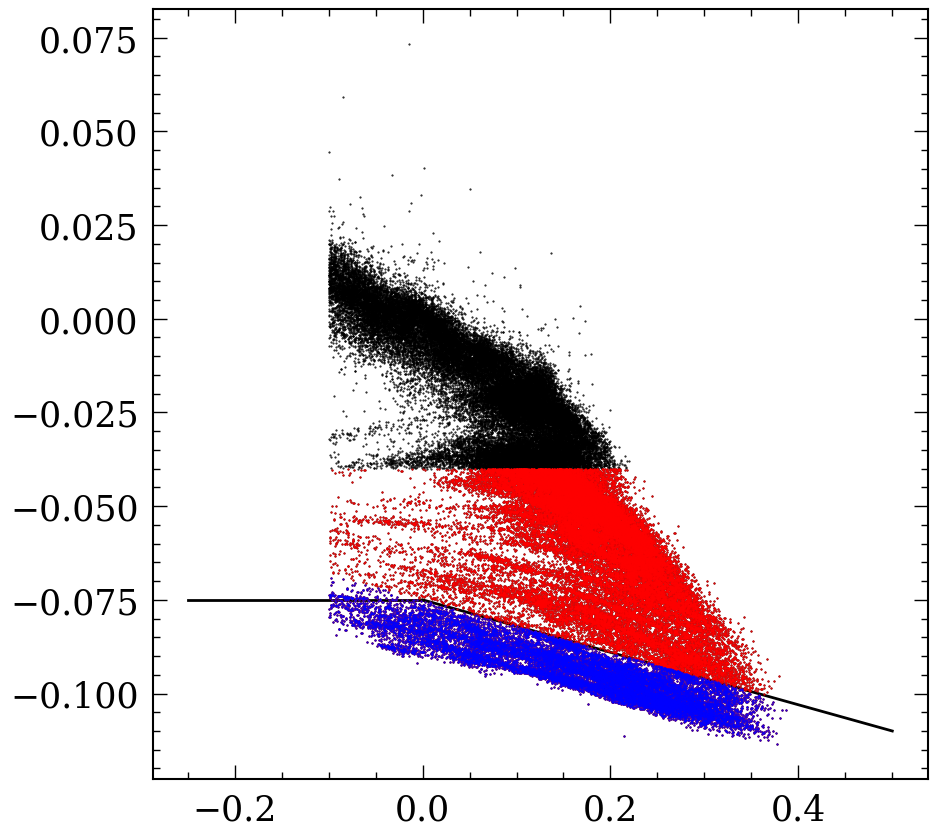

In [391]:
phl = fitpoints([0,0.5],[-0.075,-0.11])

mha = ((df_sim['[Fe/H]']<-0.5)&(df_sim['[Mg/Fe]']>0.2))|((df_sim['[Fe/H]']>=-0.5)&(df_sim['[Mg/Fe]']>phl(df_sim['[Fe/H]'])))
mla = ~mha
mha = (df_sim['[Mg/Fe]']<-0.04)

df_high = df_sim[mha].reset_index(drop=True)
df_low = df_sim[mla].reset_index(drop=True)

plt.plot([0,0.5],[-0.075,-0.11],'k-')
plt.plot([-0.25,0],[-0.075,-0.075],'k-')

plt.plot(df_sim['[Fe/H]'],df_sim['[Mg/Fe]'],'k.',markersize=1)
plt.plot(df_high['[Fe/H]'],df_high['[Mg/Fe]'],'r.',markersize=1)
plt.plot(df_low['[Fe/H]'],df_low['[Mg/Fe]'],'b.',markersize=1)

I believe for this simulation, there is a major merger at ~ 12 Gyr and lasted until 10 Gyr. 

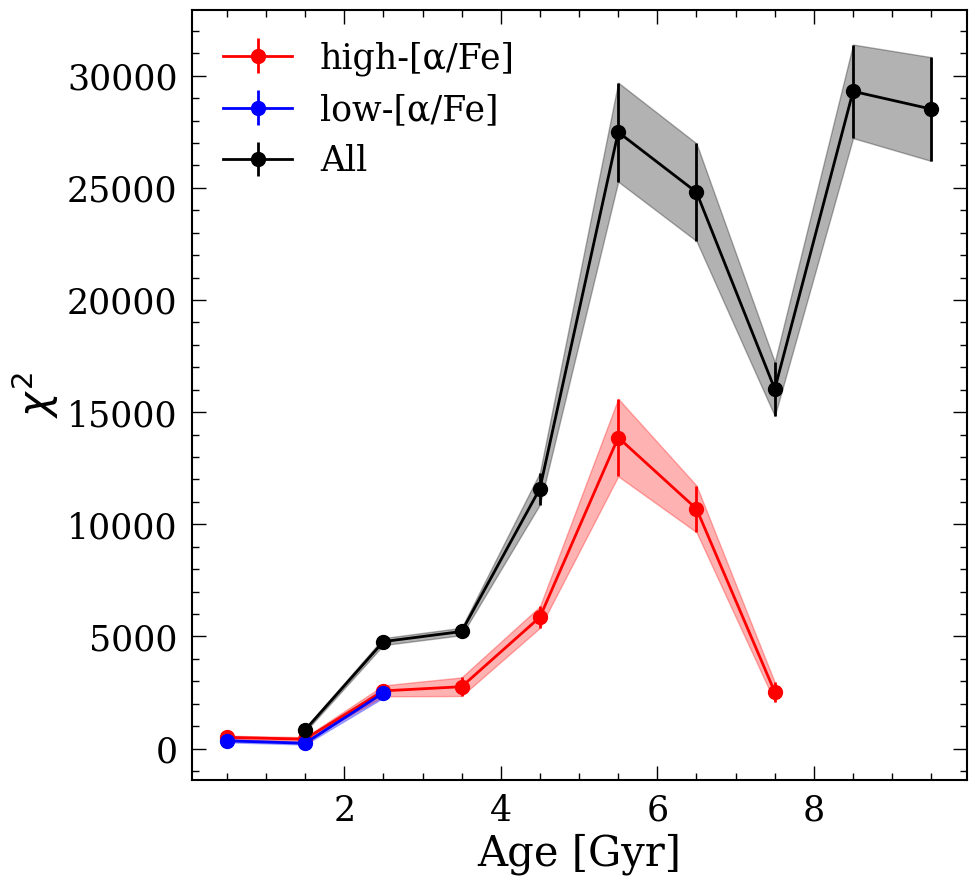

In [399]:
"""df_age_low, df_age_high, df_age = pltdiff(df_sim, df_high, df_low, np.linspace(0,9,10), np.linspace(0,4,5), 
                np.linspace(1,11,11), diffvar = 'Age', testtime=100)"""

df_age_low, df_age_high, df_age = pd.read_pickle('Age_comp_low_sim.pkl'), pd.read_pickle('Age_comp_high_sim.pkl'), pd.read_pickle('Age_comp_all_sim.pkl')


plt.errorbar(df_age_high['midbin_high'], df_age_high['chisq_high'],
             yerr=df_age_high['chisq_high_err'],
              fmt='r-o',markersize=10, zorder=100, label='high-[α/Fe]')
plt.errorbar(df_age_low['midbin_low'], df_age_low['chisq_low'],
             yerr=df_age_low['chisq_low_err'],
              fmt='b-o', markersize=10, zorder=100, label='low-[α/Fe]')
plt.errorbar(df_age['midbin_all'], df_age['chisq_all'],
             yerr=df_age['chisq_all_err'],
              fmt='k-o', markersize=10, zorder=100, label='All')

plt.fill_between(df_age_high['midbin_high'], df_age_high['chisq_high']+df_age_high['chisq_high_err'],
                 y2=df_age_high['chisq_high']-df_age_high['chisq_high_err'],
                color='r', alpha=0.3)
plt.fill_between(df_age_low['midbin_low'], df_age_low['chisq_low']+df_age_low['chisq_low_err'],
                 y2=df_age_low['chisq_low']-df_age_low['chisq_low_err'],
                color='b', alpha=0.3)
plt.fill_between(df_age['midbin_all'], df_age['chisq_all']+df_age['chisq_all_err'],
                 y2=df_age['chisq_all']-df_age['chisq_all_err'],
                color='k', alpha=0.3)

plt.ylabel('$χ^2$')
#plt.plot([-1,0.5],[1,1],'b--')
#plt.plot([-1,0.5],[2,2],'r--')
plt.xlabel('Age [Gyr]')
plt.legend(loc=2)



In [354]:
#df_age_low.to_pickle('Age_comp_low_sim.pkl')
#df_age_high.to_pickle('Age_comp_high_sim.pkl')
#df_age .to_pickle('Age_comp_all_sim.pkl')




Rb range 2.0-3.0:1888
Rb range 3.0-4.0:6327
Rb range 4.0-5.0:8167
Rb range 5.0-6.0:7803
Rb range 6.0-7.0:6496
Rb range 7.0-8.0:5280
Rb range 8.0-9.0:4449
Rb range 9.0-10.0:3166
Rb range 10.0-11.0:2317
Rb range 11.0-12.0:1592
Rb range 12.0-13.0:1223
Rb range 13.0-14.0:754


Rb range 3.0-4.0:1152
Rb range 4.0-5.0:2033
Rb range 5.0-6.0:2436
Rb range 6.0-7.0:1722
Rb range 7.0-8.0:1405
Rb range 8.0-9.0:1436
Rb range 9.0-10.0:1171
Rb range 10.0-11.0:1041
Rb range 11.0-12.0:879


Rb range 0.0-1.0:715
Rb range 1.0-2.0:1336
Rb range 2.0-3.0:2405
Rb range 3.0-4.0:3774
Rb range 4.0-5.0:5241
Rb range 5.0-6.0:6283
Rb range 6.0-7.0:6021
Rb range 7.0-8.0:4182
Rb range 8.0-9.0:2408
Rb range 9.0-10.0:910


Select stars No: high 754, low 879, all 715


100%|█████████████████████████████████████████| 100/100 [17:42<00:00, 10.62s/it]


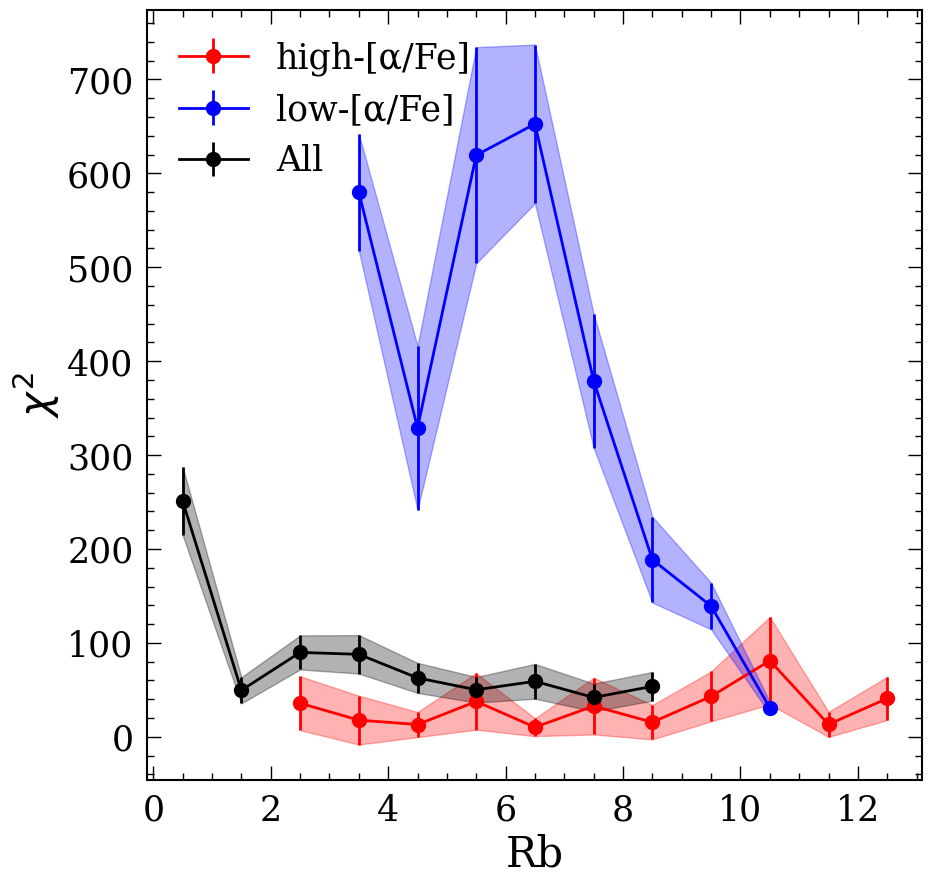

In [366]:
df_rb_low, df_rb_high, df_rb = pltdiff(df, df_high, df_low, np.linspace(2,14,13), np.linspace(3,12,10), 
                np.linspace(0,10,11), diffvar = 'Rb', testtime=100)





In [367]:
df_rb_low.to_pickle('Rb_comp_low_sim.pkl')
df_rb_high.to_pickle('Rb_comp_high_sim.pkl')
df_rb .to_pickle('Rb_comp_all_sim.pkl')



## for the simulation with a GSE-like merger

In [497]:
Rbdata = pd.read_pickle('g2.79e12_abundance_position.dat')

idx = np.in1d(Rbdata['iords_z0'], Rbdata['iords_form'])
Rbdata['r'] = np.sqrt(Rbdata['x_today']**2+Rbdata['y_today']**2)

df_sim = pd.DataFrame(np.array((Rbdata['feh'][idx], Rbdata['mgfe'][idx], 
                              Rbdata['ofe'][idx],Rbdata['sife'][idx],Rbdata['sfe'][idx],
                               Rbdata['cafe'][idx],Rbdata['tife'][idx],Rbdata['cfe'][idx],
                       Rbdata['nfe'][idx],Rbdata['alfe'][idx],Rbdata['age'][idx],Rbdata['r'][idx],Rbdata['x_birth'],
                               Rbdata['y_birth'])).T,
                      columns=['[Fe/H]','[Mg/Fe]','[O/Fe]','[Si/Fe]','[S/Fe]','[Ca/Fe]','[Ti/Fe]','[C/Fe]',\
                       '[N/Fe]','[Al/Fe]','age','r','x_birth','y_birth'])
df_sim['Rb'] = np.sqrt(df_sim['x_birth']**2+df_sim['y_birth']**2)
df_sim = df_sim.loc[(abs(df_sim['r']-10)<5)&(df_sim['[Fe/H]']>-0.5)].reset_index(drop=True)

for i in ['[Fe/H]','[Mg/Fe]','[O/Fe]','[Si/Fe]','[S/Fe]','[Ca/Fe]','[Ti/Fe]','[C/Fe]','[N/Fe]','[Al/Fe]']:
    df_sim[i+'_err'] = 0



    

In [498]:
print(len(df_sim))
df_sim['Age'] = df_sim['age']
df_sim = df_sim.loc[df_sim['Rb']<30]
print(len(df_sim))

612005
611994


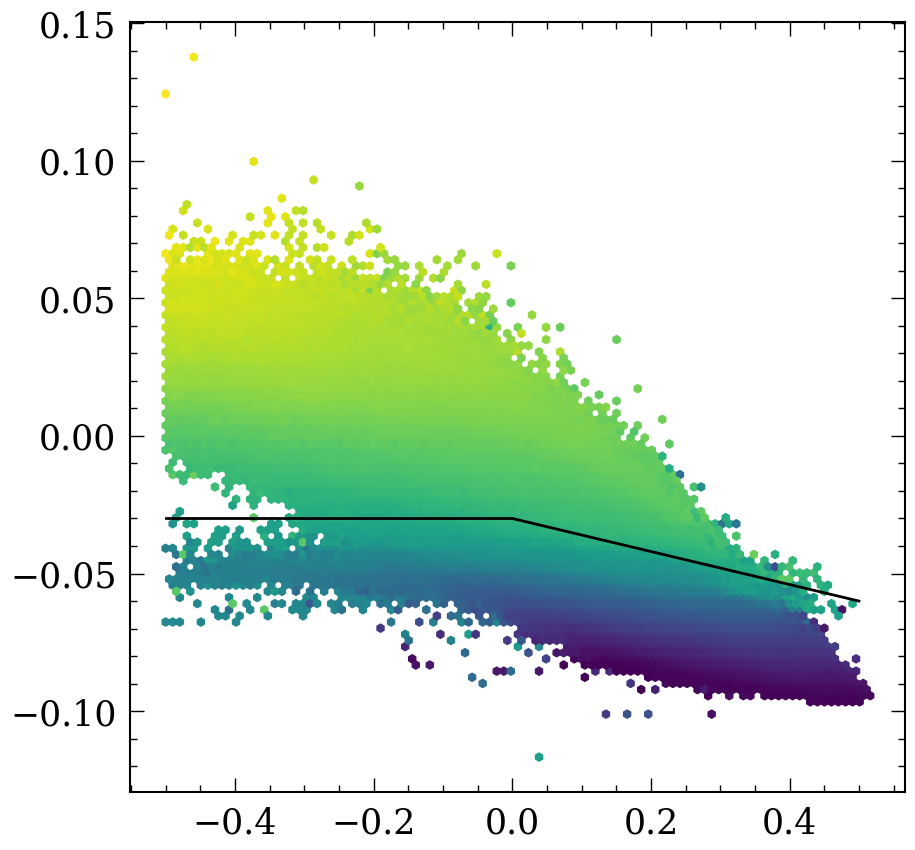

In [499]:
plt.hexbin(df_sim['[Fe/H]'], df_sim['[Mg/Fe]'],C=df_sim['Age'])
plt.plot([0,0.5],[-0.03,-0.06],'k-')
plt.plot([-0.5,0],[-0.03,-0.03],'k-')

(-0.15, 0.1)

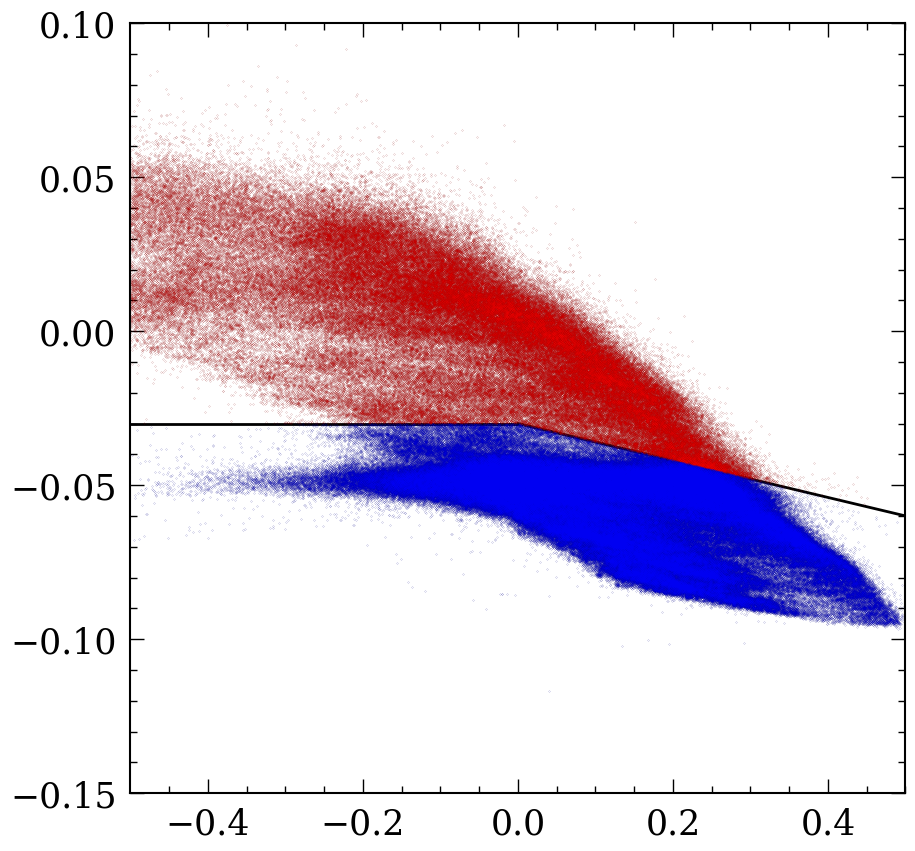

In [500]:
phl = fitpoints([0,0.5],[-0.03,-0.06])

mha = ((df_sim['[Fe/H]']<0)&(df_sim['[Mg/Fe]']>-0.03))|((df_sim['[Fe/H]']>=0)&(df_sim['[Mg/Fe]']>phl(df_sim['[Fe/H]'])))
mla = ~mha

df_high = df_sim[mha].reset_index(drop=True)
df_low = df_sim[mla].reset_index(drop=True)

plt.plot([0,0.5],[-0.03,-0.06],'k-')
plt.plot([-0.5,0],[-0.03,-0.03],'k-')

plt.plot(df_sim['[Fe/H]'],df_sim['[Mg/Fe]'],'k.',markersize=0.1)
plt.plot(df_high['[Fe/H]'],df_high['[Mg/Fe]'],'r.',markersize=0.1)
plt.plot(df_low['[Fe/H]'],df_low['[Mg/Fe]'],'b.',markersize=0.1)
plt.xlim([-0.5,0.5])
plt.ylim([-0.15,0.1])

$\chi^2$ increase while the low-$\alpha$ disk started to form. Increase for any major merger events (~11 Gyr and 3-4 Gyr)

In [ ]:
df_age_low, df_age_high, df_age = pltdiff(df_sim, df_high, df_low, np.linspace(5,12,8), np.linspace(0,9,10), 
                np.linspace(0,12,13), diffvar = 'Age', testtime=100)


"""df_age_low, df_age_high, df_age = pd.read_pickle('Age_comp_low_sim_279.pkl'), pd.read_pickle('Age_comp_high_sim_279.pkl'), pd.read_pickle('Age_comp_all_sim_279.pkl')


plt.errorbar(df_age_high['midbin_high'], df_age_high['chisq_high'],
             yerr=df_age_high['chisq_high_err'],
              fmt='r-o',markersize=10, zorder=100, label='high-[α/Fe]')
plt.errorbar(df_age_low['midbin_low'], df_age_low['chisq_low'],
             yerr=df_age_low['chisq_low_err'],
              fmt='b-o', markersize=10, zorder=100, label='low-[α/Fe]')
plt.errorbar(df_age['midbin_all'], df_age['chisq_all'],
             yerr=df_age['chisq_all_err'],
              fmt='k-o', markersize=10, zorder=100, label='All')

plt.fill_between(df_age_high['midbin_high'], df_age_high['chisq_high']+df_age_high['chisq_high_err'],
                 y2=df_age_high['chisq_high']-df_age_high['chisq_high_err'],
                color='r', alpha=0.3)
plt.fill_between(df_age_low['midbin_low'], df_age_low['chisq_low']+df_age_low['chisq_low_err'],
                 y2=df_age_low['chisq_low']-df_age_low['chisq_low_err'],
                color='b', alpha=0.3)
plt.fill_between(df_age['midbin_all'], df_age['chisq_all']+df_age['chisq_all_err'],
                 y2=df_age['chisq_all']-df_age['chisq_all_err'],
                color='k', alpha=0.3)

plt.ylabel('$χ^2$')
#plt.plot([-1,0.5],[1,1],'b--')
#plt.plot([-1,0.5],[2,2],'r--')
plt.xlabel('Age [Gyr]')
plt.legend(loc=1)"""




Age range high_alpha:5.0-6.0:340
Age range high_alpha:6.0-7.0:1051
Age range high_alpha:7.0-8.0:6360
Age range high_alpha:8.0-9.0:47833
Age range high_alpha:9.0-10.0:67217
Age range high_alpha:10.0-11.0:57025
Age range high_alpha:11.0-12.0:10341


Age range low_alpha:0.0-1.0:33239
Age range low_alpha:1.0-2.0:41091
Age range low_alpha:2.0-3.0:49833
Age range low_alpha:3.0-4.0:61452
Age range low_alpha:4.0-5.0:69316
Age range low_alpha:5.0-6.0:69200
Age range low_alpha:6.0-7.0:63737
Age range low_alpha:7.0-8.0:31008
Age range low_alpha:8.0-9.0:2691


Age range all:0.0-1.0:33240
Age range all:1.0-2.0:41092
Age range all:2.0-3.0:49838
Age range all:3.0-4.0:61482
Age range all:4.0-5.0:69425
Age range all:5.0-6.0:69540
Age range all:6.0-7.0:64788
Age range all:7.0-8.0:37368
Age range all:8.0-9.0:50524
Age range all:9.0-10.0:67248
Age range all:10.0-11.0:57025
Age range all:11.0-12.0:10341


Select stars No: high 340, low 2691, all 10341


  0%|                                                   | 0/100 [00:00<?, ?it/s]

In [ ]:
df_age_low.to_pickle('Age_comp_low_sim_279.pkl')
df_age_high.to_pickle('Age_comp_high_sim_279.pkl')
df_age.to_pickle('Age_comp_all_sim_279.pkl')





(0.0, 400.0)

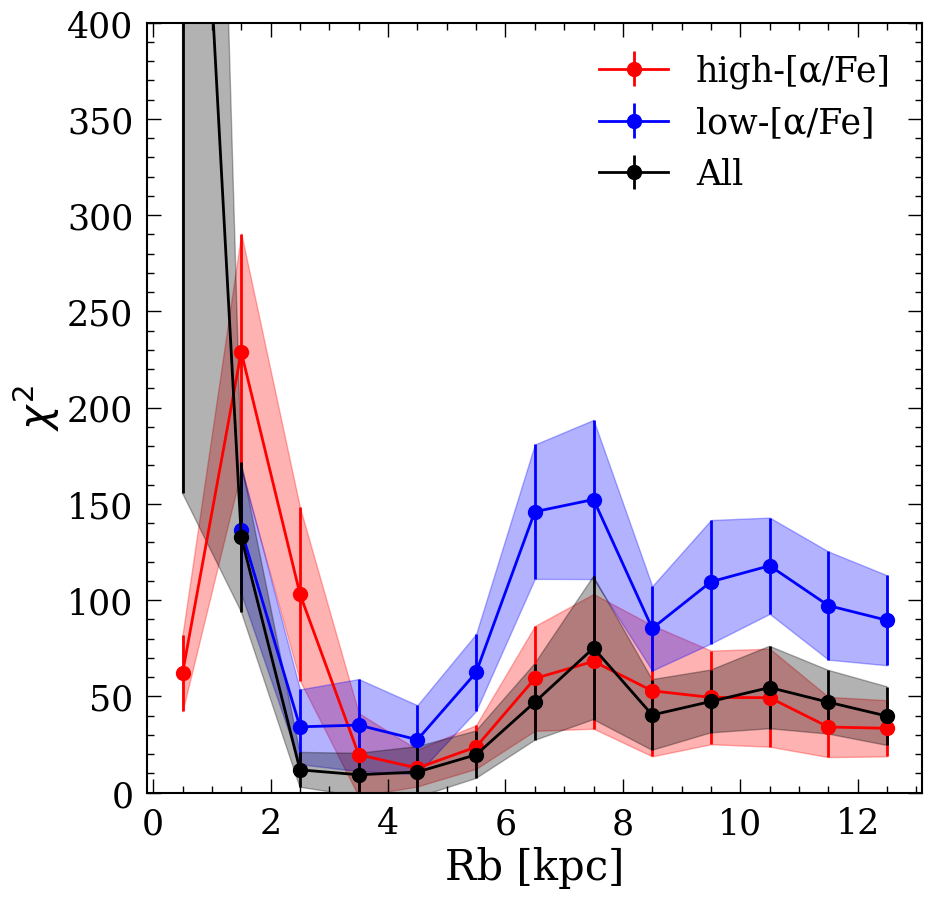

In [479]:
"""df_rb_low, df_rb_high, df_rb = pltdiff(df_sim, df_high, df_low, np.linspace(0,14,15), np.linspace(1,14,14), 
                np.linspace(0,14,15), diffvar = 'Rb', testtime=100)



"""



df_age_low, df_age_high, df_age = pd.read_pickle('Rb_comp_low_sim_279.pkl'), pd.read_pickle('Rb_comp_high_sim_279.pkl'), pd.read_pickle('Rb_comp_all_sim_279.pkl')


plt.errorbar(df_age_high['midbin_high'], df_age_high['chisq_high'],
             yerr=df_age_high['chisq_high_err'],
              fmt='r-o',markersize=10, zorder=100, label='high-[α/Fe]')
plt.errorbar(df_age_low['midbin_low'], df_age_low['chisq_low'],
             yerr=df_age_low['chisq_low_err'],
              fmt='b-o', markersize=10, zorder=100, label='low-[α/Fe]')
plt.errorbar(df_age['midbin_all'], df_age['chisq_all'],
             yerr=df_age['chisq_all_err'],
              fmt='k-o', markersize=10, zorder=100, label='All')

plt.fill_between(df_age_high['midbin_high'], df_age_high['chisq_high']+df_age_high['chisq_high_err'],
                 y2=df_age_high['chisq_high']-df_age_high['chisq_high_err'],
                color='r', alpha=0.3)
plt.fill_between(df_age_low['midbin_low'], df_age_low['chisq_low']+df_age_low['chisq_low_err'],
                 y2=df_age_low['chisq_low']-df_age_low['chisq_low_err'],
                color='b', alpha=0.3)
plt.fill_between(df_age['midbin_all'], df_age['chisq_all']+df_age['chisq_all_err'],
                 y2=df_age['chisq_all']-df_age['chisq_all_err'],
                color='k', alpha=0.3)

plt.ylabel('$χ^2$')
#plt.plot([-1,0.5],[1,1],'b--')
#plt.plot([-1,0.5],[2,2],'r--')
plt.xlabel('Rb [kpc]')
plt.legend(loc=1)
plt.ylim([0,400])



In [477]:
"""df_rb_low.to_pickle('Rb_comp_low_sim_279.pkl')
df_rb_high.to_pickle('Rb_comp_high_sim_279.pkl')
df_rb.to_pickle('Rb_comp_all_sim_279.pkl')




"""